# Introduction and Preprocessing

In [1]:
!pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.5/35.5 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.7/145.7 kB 10.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sktime.datasets import load_airline, load_uschange, load_basic_motions
from sktime.utils.plotting import plot_series

## Intro

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the data

In [4]:
# from csv
ts = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/imdb_ts.csv", index_col=0)
ts.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,rating,genre,rating_category
id,,,,,,,,,,,,,,,,,,,,,
tt0062622,57057.0,65469.0,71642.0,73025.0,74060.0,49472.0,30258.0,28036.0,25824.0,32571.0,...,10709.0,11042.0,11388.0,11847.0,12404.0,13679.0,15056.0,8.3,"['Adventure', 'Sci-Fi']",High
tt0064816,1923.0,2422.0,2853.0,2947.0,3054.0,2844.0,2617.0,1998.0,1277.0,1449.0,...,637.0,734.0,857.0,785.0,724.0,713.0,699.0,7.1,"['Crime', 'Drama', 'Romance']",High
tt0088178,332925.0,302503.0,267264.0,261879.0,256608.0,196530.0,112728.0,117384.0,123024.0,119608.0,...,6784.0,7253.0,7776.0,9632.0,11212.0,9010.0,6431.0,8.7,"['Documentary', 'Music']",High
tt0145487,682857.0,407032.0,78058.0,81732.0,86772.0,83724.0,79940.0,39656.0,6974.0,7697.0,...,21094.0,10995.0,1586.0,1421.0,1177.0,970.0,802.0,7.4,"['Action', 'Adventure', 'Sci-Fi']",High
tt0359950,7813372.0,6274563.0,4781588.0,4655046.0,4535301.0,4650574.0,4758452.0,4069428.0,3471755.0,3108057.0,...,88635.0,68347.0,45367.0,28915.0,15494.0,16155.0,16853.0,7.3,"['Adventure', 'Comedy', 'Drama']",High


## Some basic statistics

In [ ]:
ts.shape

(1134, 103)

In [ ]:
len(ts)

1134

In [ ]:
ts.index

Index(['tt0062622', 'tt0064816', 'tt0088178', 'tt0145487', 'tt0359950',
       'tt0369610', 'tt0435651', 'tt0437086', 'tt0439572', 'tt0448115',
       ...
       'tt9603212', 'tt9620288', 'tt9620292', 'tt9663764', 'tt9682428',
       'tt9731534', 'tt9735462', 'tt9764362', 'tt9784798', 'tt9883996'],
      dtype='object', name='id', length=1134)

In [ ]:
# what is the frequency of the time series?
#ts.index.freqstr

In [ ]:
#ts.index.year

In [ ]:
# how many values from each year?
#ts.index.year.value_counts()

In [ ]:
ts.values

array([[57057.0, 65469.0, 71642.0, ..., 8.3, "['Adventure', 'Sci-Fi']",
        'High'],
       [1923.0, 2422.0, 2853.0, ..., 7.1,
        "['Crime', 'Drama', 'Romance']", 'High'],
       [332925.0, 302503.0, 267264.0, ..., 8.7,
        "['Documentary', 'Music']", 'High'],
       ...,
       [3595005.0, 3401235.0, 3221227.0, ..., 7.2,
        "['Comedy', 'Horror', 'Thriller']", 'High'],
       [528167.0, 617409.0, 696127.0, ..., 7.4,
        "['Biography', 'Drama', 'History']", 'High'],
       [260429.0, 296061.0, 327698.0, ..., 6.9,
        "['Biography', 'Comedy', 'Drama']", 'Medium High']], dtype=object)

In [ ]:
#ts.array

In [ ]:
ts.to_numpy()

array([[57057.0, 65469.0, 71642.0, ..., 8.3, "['Adventure', 'Sci-Fi']",
        'High'],
       [1923.0, 2422.0, 2853.0, ..., 7.1,
        "['Crime', 'Drama', 'Romance']", 'High'],
       [332925.0, 302503.0, 267264.0, ..., 8.7,
        "['Documentary', 'Music']", 'High'],
       ...,
       [3595005.0, 3401235.0, 3221227.0, ..., 7.2,
        "['Comedy', 'Horror', 'Thriller']", 'High'],
       [528167.0, 617409.0, 696127.0, ..., 7.4,
        "['Biography', 'Drama', 'History']", 'High'],
       [260429.0, 296061.0, 327698.0, ..., 6.9,
        "['Biography', 'Comedy', 'Drama']", 'Medium High']], dtype=object)

In [ ]:
ts.describe()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,rating
count,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,...,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1134.000000
mean,9.075217e+06,8.521398e+06,7.954433e+06,7.080579e+06,6.200350e+06,4.567772e+06,2.943717e+06,2.932913e+06,2.929824e+06,2.503033e+06,...,3.173743e+05,2.546920e+05,1.909471e+05,1.804780e+05,1.711978e+05,1.457827e+05,1.192445e+05,1.153249e+05,1.111532e+05,6.584921
std,1.559543e+07,1.366932e+07,1.188300e+07,1.066701e+07,9.596818e+06,7.180084e+06,5.160170e+06,4.787618e+06,4.569201e+06,4.050967e+06,...,6.415705e+05,5.310139e+05,4.772244e+05,4.025968e+05,3.688206e+05,2.941344e+05,2.332032e+05,2.303428e+05,2.333821e+05,0.900217
min,1.266000e+03,2.422000e+03,2.853000e+03,2.947000e+03,3.054000e+03,2.844000e+03,1.940000e+03,1.865000e+03,1.277000e+03,1.449000e+03,...,3.500000e+01,3.500000e+01,1.200000e+01,3.000000e+01,2.200000e+01,2.700000e+01,2.800000e+01,3.600000e+01,8.000000e+00,2.800000
25%,4.618975e+05,4.531445e+05,4.673408e+05,4.031570e+05,3.583830e+05,2.618655e+05,1.592525e+05,1.908358e+05,2.043262e+05,1.841965e+05,...,2.182375e+04,1.651875e+04,9.954500e+03,1.058575e+04,1.100675e+04,1.010200e+04,8.811000e+03,8.601000e+03,8.172000e+03,6.100000
50%,4.025919e+06,4.033458e+06,3.895830e+06,3.517052e+06,2.964305e+06,2.191776e+06,1.181900e+06,1.359742e+06,1.440482e+06,1.179675e+06,...,7.906950e+04,5.739150e+04,3.938500e+04,4.051050e+04,3.979450e+04,3.570550e+04,3.170750e+04,2.986700e+04,2.871100e+04,6.600000
75%,1.001112e+07,9.694290e+06,9.531908e+06,8.363360e+06,7.279080e+06,5.356860e+06,3.211315e+06,3.420557e+06,3.555019e+06,2.948315e+06,...,3.227622e+05,2.504522e+05,1.494638e+05,1.626510e+05,1.647458e+05,1.469250e+05,1.189488e+05,1.151650e+05,1.072790e+05,7.300000
max,1.574616e+08,1.345532e+08,1.092641e+08,9.905818e+07,9.038924e+07,6.824053e+07,5.698972e+07,4.744864e+07,3.736173e+07,3.768914e+07,...,1.103245e+07,8.485023e+06,6.093301e+06,4.575375e+06,5.959033e+06,4.065463e+06,2.168520e+06,2.956294e+06,3.716898e+06,8.700000


In [ ]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1134 entries, tt0062622 to tt9883996
Columns: 103 entries, 0 to rating_category
dtypes: float64(101), object(2)
memory usage: 921.4+ KB


In [ ]:
print(ts.columns)


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '93', '94', '95', '96', '97', '98', '99', 'rating', 'genre',
       'rating_category'],
      dtype='object', length=103)


In [ ]:
# Step 1: Select only day columns (0-99)
day_cols = [str(i) for i in range(100)]

# Step 2: Melt wide to long format
melted = ts[day_cols].melt(var_name='day', value_name='revenue')
melted['day'] = melted['day'].astype(int)

# Step 3: Compute average revenue for each day
avg_rev_df = melted.groupby('day')['revenue'].mean().reset_index()
avg_rev_df.rename(columns={'revenue': 'avg_revenue'}, inplace=True)

# Step 4: Calculate mean deviation and MAD
mean_avg_rev = avg_rev_df['avg_revenue'].mean()
avg_rev_df['deviation'] = avg_rev_df['avg_revenue'] - mean_avg_rev
avg_rev_df['abs_deviation'] = avg_rev_df['deviation'].abs()
mean_deviation = avg_rev_df['deviation'].mean()
mean_abs_deviation = avg_rev_df['abs_deviation'].mean()

# Step 5: Output
print(avg_rev_df.head())
print(f"Mean Deviation: {mean_deviation}")
print(f"Mean Absolute Deviation: {mean_abs_deviation}")

   day   avg_revenue     deviation  abs_deviation
0    0  9.075217e+06  7.607143e+06   7.607143e+06
1    1  8.521398e+06  7.053323e+06   7.053323e+06
2    2  7.954433e+06  6.486359e+06   6.486359e+06
3    3  7.080579e+06  5.612505e+06   5.612505e+06
4    4  6.200350e+06  4.732275e+06   4.732275e+06
Mean Deviation: 2.561137080192566e-10
Mean Absolute Deviation: 1218411.5363989417


In [ ]:
avg_rev_df

,day,avg_revenue,deviation,abs_deviation
0,0,9.075217e+06,7.607143e+06,7.607143e+06
1,1,8.521398e+06,7.053323e+06,7.053323e+06
2,2,7.954433e+06,6.486359e+06,6.486359e+06
3,3,7.080579e+06,5.612505e+06,5.612505e+06
4,4,6.200350e+06,4.732275e+06,4.732275e+06
...,...,...,...,...
95,95,1.711978e+05,-1.296877e+06,1.296877e+06
96,96,1.457827e+05,-1.322292e+06,1.322292e+06
97,97,1.192445e+05,-1.348830e+06,1.348830e+06
98,98,1.153249e+05,-1.352750e+06,1.352750e+06


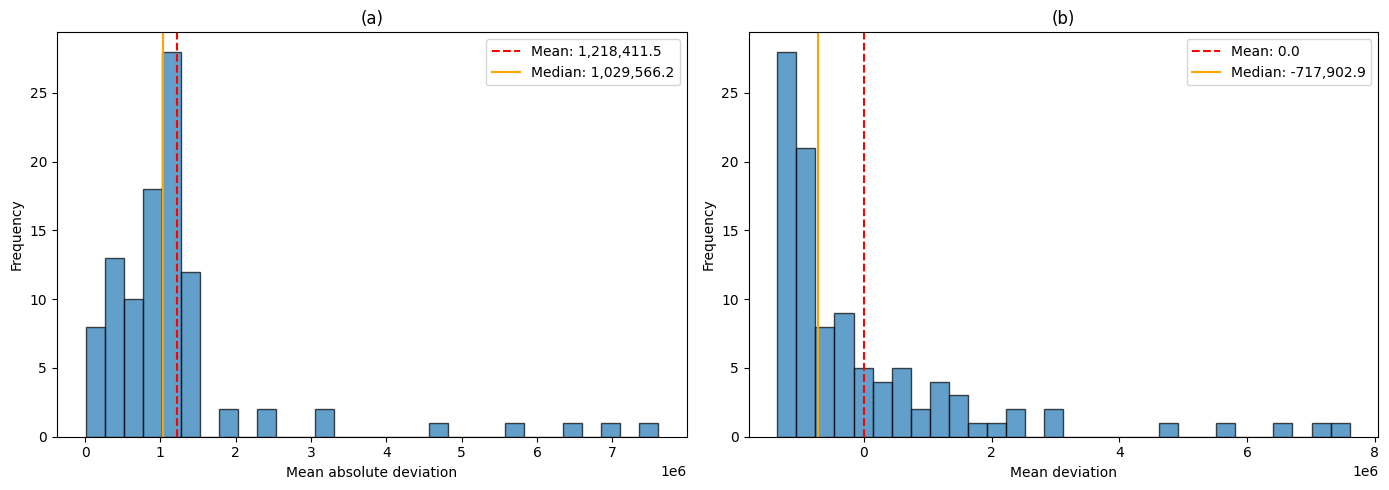

Mean Absolute Deviation: 1,218,411.5
Mean Deviation: 0.0


In [ ]:
# 1. Calculate mean
mean_avg_revenue = avg_rev_df['avg_revenue'].mean()

# 2. Calculate deviation columns
avg_rev_df['deviation'] = avg_rev_df['avg_revenue'] - mean_avg_revenue
avg_rev_df['abs_deviation'] = avg_rev_df['deviation'].abs()

# 3. Compute metrics
mean_deviation = avg_rev_df['deviation'].mean()
mean_abs_deviation = avg_rev_df['abs_deviation'].mean()
median_deviation = avg_rev_df['deviation'].median()
median_abs_deviation = avg_rev_df['abs_deviation'].median()

# 4. Plotting (side by side)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# (a) Mean Absolute Deviation
axes[0].hist(avg_rev_df['abs_deviation'], bins=30, alpha=0.7, edgecolor='black')
axes[0].axvline(mean_abs_deviation, color='red', linestyle='--', label=f"Mean: {mean_abs_deviation:,.1f}")
axes[0].axvline(median_abs_deviation, color='orange', linestyle='-', label=f"Median: {median_abs_deviation:,.1f}")
axes[0].set_xlabel("Mean absolute deviation")
axes[0].set_ylabel("Frequency")
axes[0].set_title("(a)")
axes[0].legend()

# (b) Mean Deviation
axes[1].hist(avg_rev_df['deviation'], bins=30, alpha=0.7, edgecolor='black')
axes[1].axvline(mean_deviation, color='red', linestyle='--', label=f"Mean: {mean_deviation:,.1f}")
axes[1].axvline(median_deviation, color='orange', linestyle='-', label=f"Median: {median_deviation:,.1f}")
axes[1].set_xlabel("Mean deviation")
axes[1].set_ylabel("Frequency")
axes[1].set_title("(b)")
axes[1].legend()

plt.tight_layout()
plt.show()

# 5. Print metrics
print(f"Mean Absolute Deviation: {mean_abs_deviation:,.1f}")
print(f"Mean Deviation: {mean_deviation:,.1f}")

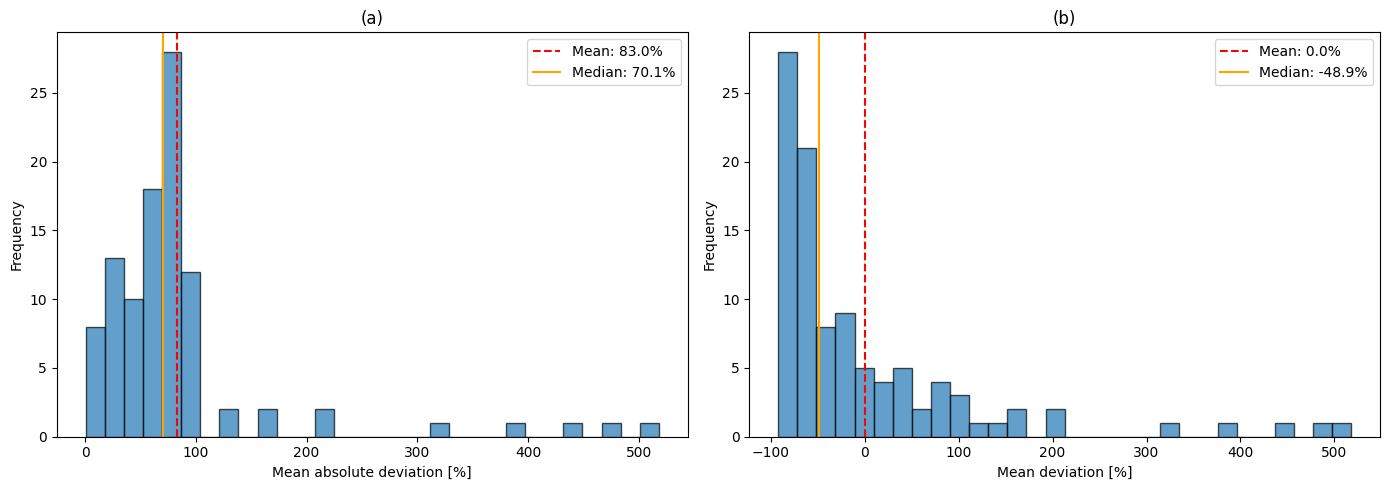

In [ ]:
# Calculate the mean
mean_avg_revenue = avg_rev_df['avg_revenue'].mean()

# Calculate deviation and abs_deviation
avg_rev_df['deviation'] = avg_rev_df['avg_revenue'] - mean_avg_revenue
avg_rev_df['abs_deviation'] = avg_rev_df['deviation'].abs()

# Convert to percentage
avg_rev_df['deviation_pct'] = (avg_rev_df['deviation'] / mean_avg_revenue) * 100
avg_rev_df['abs_deviation_pct'] = (avg_rev_df['abs_deviation'] / mean_avg_revenue) * 100

# Mean and median in percent
mean_deviation_pct = avg_rev_df['deviation_pct'].mean()
median_deviation_pct = avg_rev_df['deviation_pct'].median()
mean_abs_deviation_pct = avg_rev_df['abs_deviation_pct'].mean()
median_abs_deviation_pct = avg_rev_df['abs_deviation_pct'].median()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# (a) Mean Absolute Deviation (%)
axes[0].hist(avg_rev_df['abs_deviation_pct'], bins=30, alpha=0.7, edgecolor='black')
axes[0].axvline(mean_abs_deviation_pct, color='red', linestyle='--', label=f"Mean: {mean_abs_deviation_pct:.1f}%")
axes[0].axvline(median_abs_deviation_pct, color='orange', linestyle='-', label=f"Median: {median_abs_deviation_pct:.1f}%")
axes[0].set_xlabel("Mean absolute deviation [%]")
axes[0].set_ylabel("Frequency")
axes[0].set_title("(a)")
axes[0].legend()

# (b) Mean Deviation (%)
axes[1].hist(avg_rev_df['deviation_pct'], bins=30, alpha=0.7, edgecolor='black')
axes[1].axvline(mean_deviation_pct, color='red', linestyle='--', label=f"Mean: {mean_deviation_pct:.1f}%")
axes[1].axvline(median_deviation_pct, color='orange', linestyle='-', label=f"Median: {median_deviation_pct:.1f}%")
axes[1].set_xlabel("Mean deviation [%]")
axes[1].set_ylabel("Frequency")
axes[1].set_title("(b)")
axes[1].legend()

plt.tight_layout()
plt.show()

## Understanding

In [ ]:
# pandas
#ts.plot()
#plt.show()

### Phân tích vòng đời doanh thu

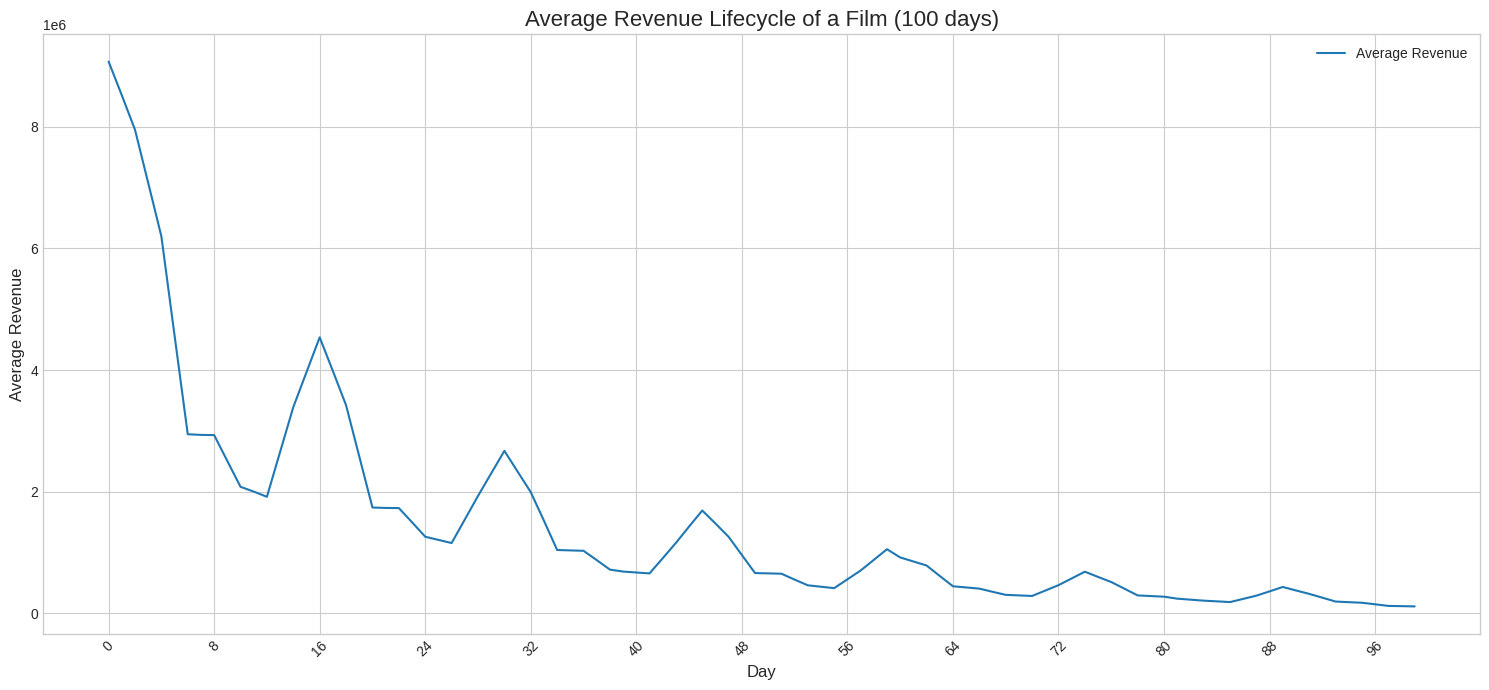

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
# Chọn các cột ngày (từ '0' đến '99')
day_columns = [str(i) for i in range(100)]
time_series_data = ts[day_columns]

# Tính doanh số trung bình tại mỗi ngày
average_lifecycle = time_series_data.mean(axis=0)

# --- Vẽ biểu đồ ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 7))

# Vẽ đường biểu diễn doanh số trung bình
plt.plot(average_lifecycle.index, average_lifecycle.values, label='Average Revenue')

# Thiết lập tiêu đề và nhãn cho biểu đồ
plt.title('Average Revenue Lifecycle of a Film (100 days)', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Average Revenue', fontsize=12)
plt.xticks(rotation=45)

# Tối ưu hóa số lượng nhãn trên trục X để dễ đọc hơn
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=15))

# Hiển thị chú thích
plt.legend()
plt.tight_layout()

# Lưu biểu đồ thành file ảnh
plt.savefig('average_film_revenue_lifecycle.png')

# Tìm ngày và giá trị doanh số đỉnh
peak_day = average_lifecycle.idxmax()
peak_value = average_lifecycle.max()

##
- Phân tích cho thấy một bộ phim điển hình đạt đỉnh doanh số vào khoảng ngày đầu công chiếu với doanh số trung bình là 9,075,217.
- Cứ 2 tuần đạt đỉnh 1 lần => xu hướng xem phim 2 tuần 1 lần?

### Phân tích vòng đời doanh thu từng thể loại

Mã đã chạy thành công! Biểu đồ được lưu với tên 'all_genres_lifecycles_final.png'
Tổng số thể loại duy nhất được phân tích: 22


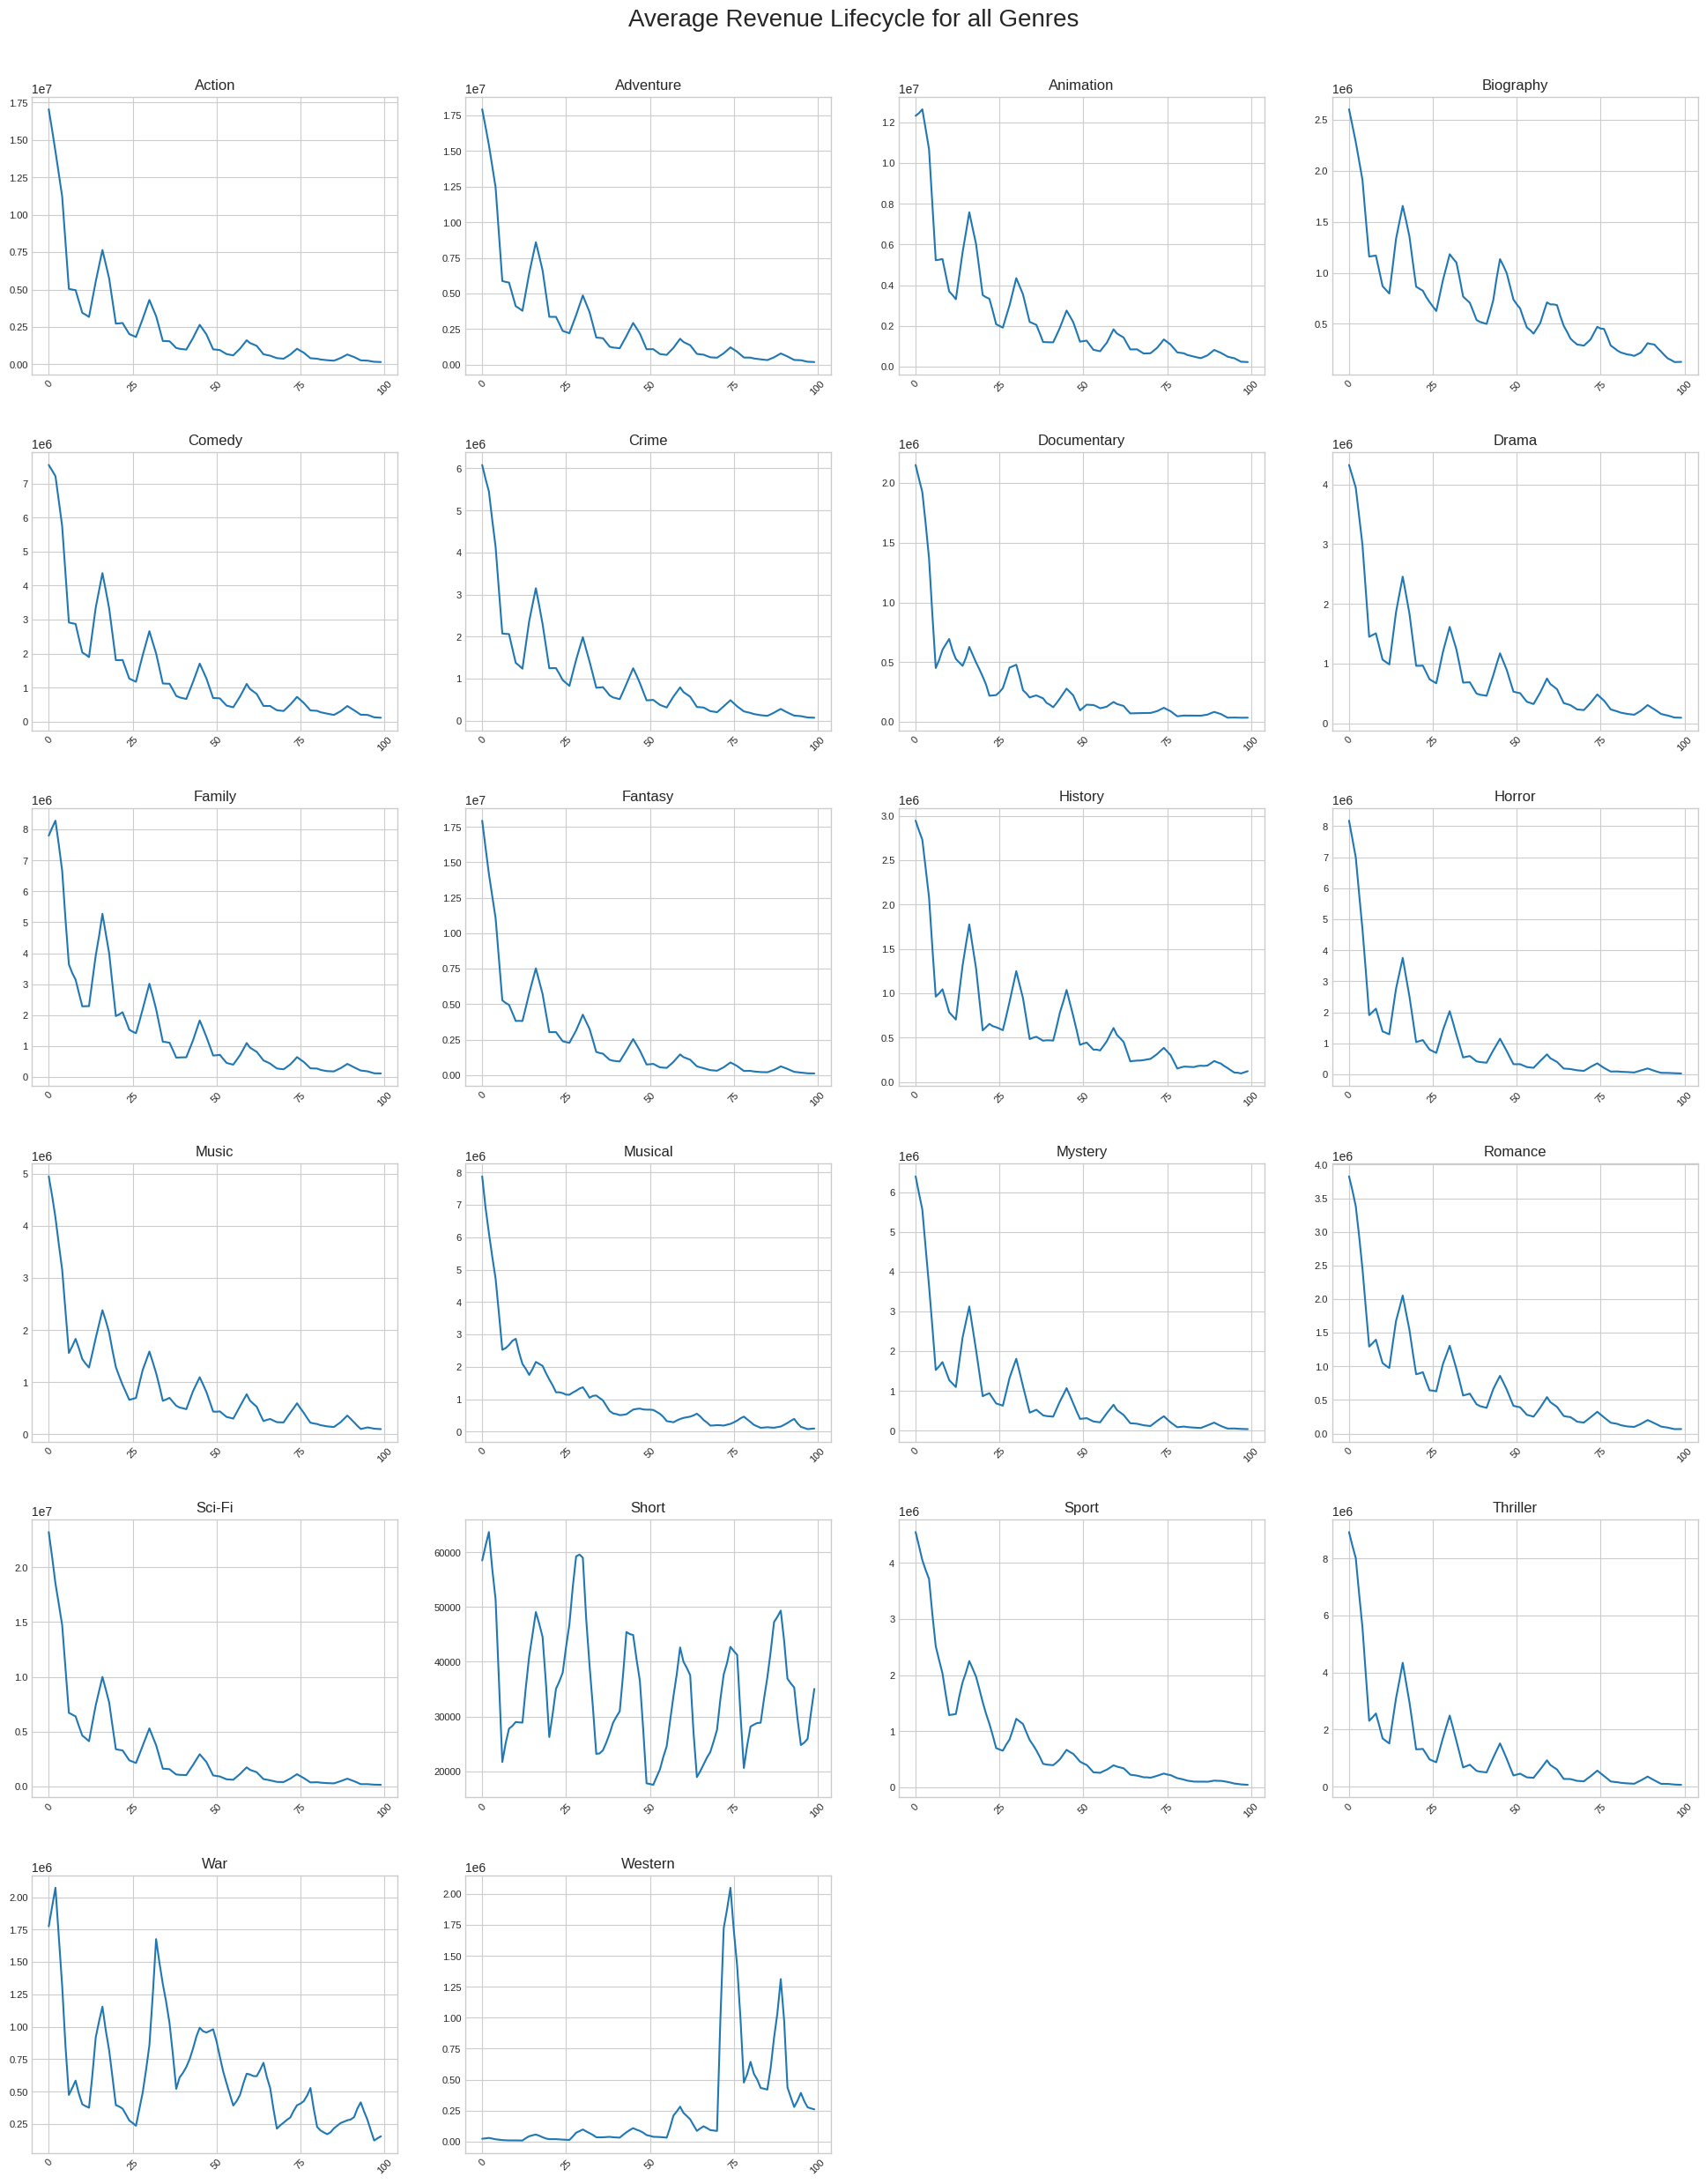

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import ast  # Thư viện để xử lý chuỗi thành đối tượng Python một cách an toàn

try:
    # --- Bước 2: Tạo một bản sao để xử lý ---
    ts_processed = ts.copy()

    # --- Bước 3: Xử lý dữ liệu trên bản sao một cách chính xác ---
    ts_processed['genre_list'] = ts_processed['genre'].apply(ast.literal_eval)

    # Dùng hàm "explode" để mỗi thể loại có một hàng riêng
    ts_exploded = ts_processed.explode('genre_list')

    # Đổi tên cột để dễ hiểu hơn và loại bỏ khoảng trắng thừa
    ts_exploded = ts_exploded.rename(columns={'genre_list': 'genre_single'})
    ts_exploded['genre_single'] = ts_exploded['genre_single'].str.strip()

    # Xóa các hàng có thể loại rỗng
    ts_exploded = ts_exploded[ts_exploded['genre_single'] != '']

    # --- Bước 4: Phân tích và vẽ biểu đồ ---
    day_columns = [str(i) for i in range(100)]
    lifecycle_by_genre = ts_exploded.groupby('genre_single')[day_columns].mean()

    genres = lifecycle_by_genre.index.tolist()
    num_genres = len(genres)

    num_cols = 4
    num_rows = math.ceil(num_genres / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 25))
    axes = axes.flatten()

    # Vòng lặp để vẽ các biểu đồ
    for i, genre in enumerate(genres):
        ax = axes[i]
        data = lifecycle_by_genre.loc[genre]
        x_values = [int(day) for day in data.index]
        ax.plot(x_values, data.values)
        ax.set_title(genre, fontsize=12)
        ax.tick_params(axis='x', rotation=45, labelsize=8)
        ax.tick_params(axis='y', labelsize=8)
        ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=5, integer=True))

    # Vòng lặp để ẩn các ô không sử dụng
    for j in range(num_genres, len(axes)):
        axes[j].set_visible(False)

    # Các lệnh cuối cùng để hoàn thiện và lưu biểu đồ
    fig.suptitle('Average Revenue Lifecycle for all Genres', fontsize=20, y=1.0)
    plt.tight_layout(pad=3.0)
    fig.subplots_adjust(top=0.96)

    plt.savefig('all_genres_lifecycles_final.png')
    print("Mã đã chạy thành công! Biểu đồ được lưu với tên 'all_genres_lifecycles_final.png'")
    print(f"Tổng số thể loại duy nhất được phân tích: {num_genres}")

except FileNotFoundError:
    print("Lỗi: Không tìm thấy file 'imdb_ts.csv'. Vui lòng kiểm tra lại.")
except Exception as e:
    print(f"Đã xảy ra một lỗi không mong muốn: {e}")

###
Nhóm "Bom tấn" (Action, Adventure, Sci-Fi, Fantasy, Animation): Như chúng ta đã thấy trước đây, nhóm này có mẫu hình chung là một đỉnh doanh thu rất cao và nhọn ngay trong tuần đầu tiên, sau đó giảm nhanh. Đây là đặc trưng của các phim được quảng bá rầm rộ.

Nhóm "Ổn định" (Drama, Comedy, Romance): Các thể loại này cũng đạt đỉnh sớm nhưng đỉnh của chúng không quá cao như nhóm bom tấn. Đường cong của chúng có xu hướng giảm từ từ hơn, cho thấy một lượng khán giả ổn định hơn theo thời gian.

Nhóm "Thị trường ngách" (Documentary, History, War): Các phim tài liệu, lịch sử, chiến tranh thường có mức doanh thu ban đầu khiêm tốn. Đôi khi, vòng đời của chúng có thể có những đỉnh nhỏ sau này nếu phim nhận được giải thưởng hoặc có một sự kiện liên quan xảy ra, nhưng nhìn chung chúng có doanh thu thấp và ổn định.

Nhóm "Đặc biệt" (Horror, Thriller): Phim kinh dị và giật gân thường có đỉnh rất nhọn và giảm cực kỳ nhanh. Khán giả của thể loại này thường muốn trải nghiệm cảm giác mạnh ngay khi phim ra mắt, và ít có xu hướng xem lại.

Phim short có vẻ đều nhưng ở mức thấp nên có thể hiểu là thấp từ thời điểm ra mắt đến khi hết chiếu

Phim viễn tây có thời điểm lên cao là do 1 sự kiện nào đó ngẫu nhiên dẫn đến kéo khản giả cho phim


### So sánh doanh thu theo Rating category

--- Average Rating follow 'rating_category' ---
rating_category
Low             62,486,410
Medium Low      70,218,059
Medium         128,644,544
Medium High    155,865,506
High           188,118,371
Name: total_revenue, dtype: object
--------------------------------------------------
Đã tạo biểu đồ 'rating_category_revenue_analysis.png' để phân tích theo cột 'rating_category'.


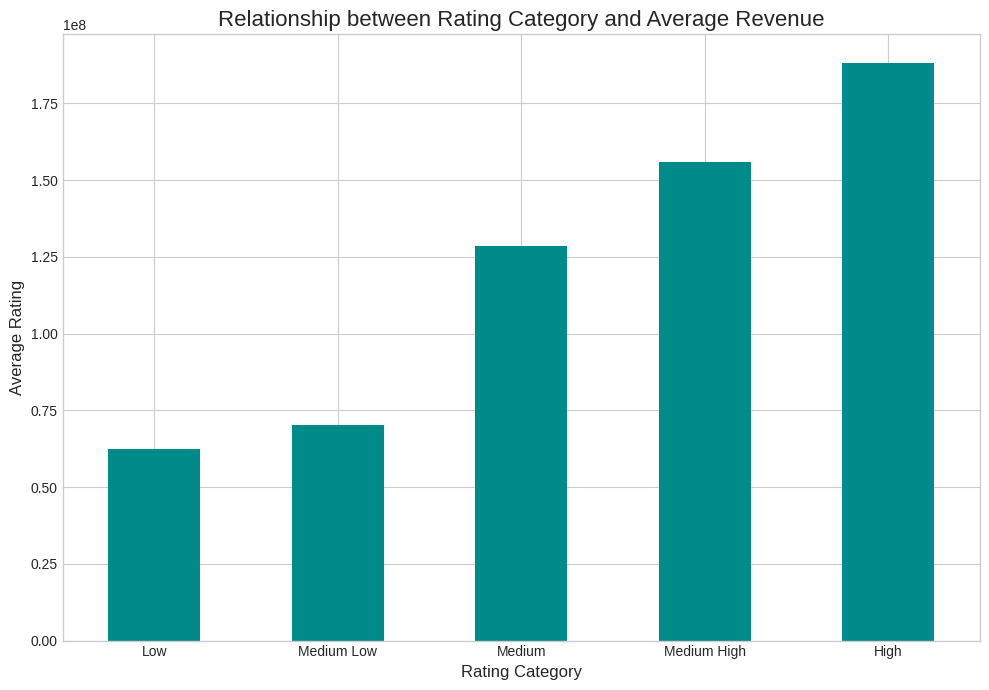

In [ ]:
# --- Bước 1: Tính tổng doanh thu 100 ngày cho mỗi phim ---
day_columns = [str(i) for i in range(100)]
ts['total_revenue'] = ts[day_columns].sum(axis=1)

# --- Bước 2: Nhóm theo 'rating_category' và tính doanh thu trung bình ---
revenue_by_category = ts.groupby('rating_category')['total_revenue'].mean().sort_values()

# In kết quả dạng văn bản ra màn hình
print("--- Average Rating follow 'rating_category' ---")
print(revenue_by_category.apply(lambda x: f"{x:,.0f}"))
print("-" * 50)


# --- Bước 3: Vẽ biểu đồ cột ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 7))

# Sử dụng .plot(kind='bar') để vẽ biểu đồ cột
revenue_by_category.plot(kind='bar', color='darkcyan')

# Thiết lập tiêu đề và các nhãn
plt.title('Relationship between Rating Category and Average Revenue', fontsize=16)
plt.xlabel('Rating Category', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

# Giữ các nhãn trên trục X thẳng đứng để dễ đọc
plt.xticks(rotation=0)

# Tự động điều chỉnh cho vừa vặn
plt.tight_layout()

# Lưu biểu đồ thành file ảnh
plt.savefig('rating_category_revenue_analysis.png')

print("Đã tạo biểu đồ 'rating_category_revenue_analysis.png' để phân tích theo cột 'rating_category'.")

### Tìm thể loại có rating trung bình coa nhất

--- Rating Average based on Genres ---
genre_single
Documentary    7.274074
Short          7.150000
War            7.091667
Biography      7.074324
Western        7.050000
History        7.012698
Music          7.007692
Sport          6.970833
Musical        6.833333
Drama          6.827899
Animation      6.681513
Crime          6.667568
Romance        6.557273
Adventure      6.553352
Action         6.543175
Sci-Fi         6.528000
Comedy         6.469363
Fantasy        6.346512
Thriller       6.307500
Family         6.262121
Mystery        6.174000
Horror         5.925197
Name: rating, dtype: float64
--------------------------------------------------
🥇 Thể loại có rating trung bình cao nhất là: 'Documentary' với điểm số 7.27.
--------------------------------------------------

Đã tạo biểu đồ 'average_rating_by_genre.png' thành công.


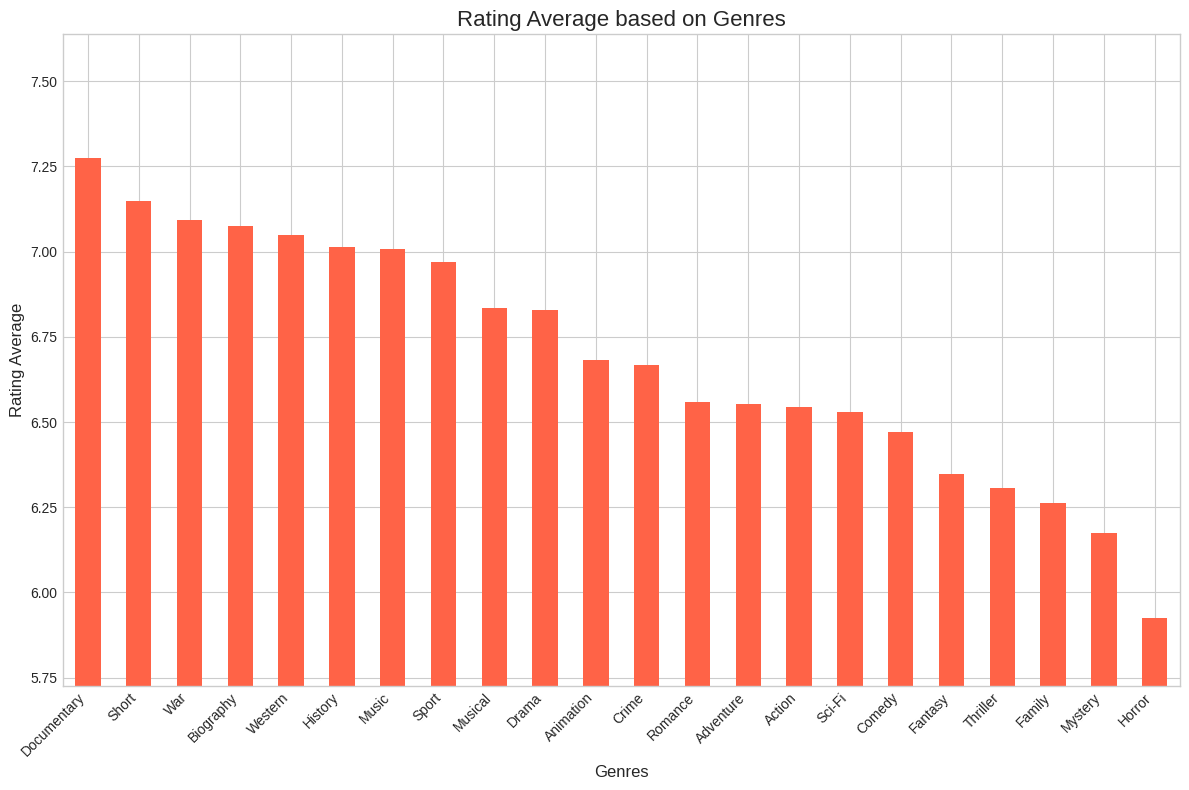

In [ ]:
try:

    # --- Bước 2: Phân tích rating trung bình theo thể loại ---
    average_rating_by_genre = ts_exploded.groupby('genre_single')['rating'].mean().sort_values(ascending=False)

    # In kết quả dạng văn bản
    print("--- Rating Average based on Genres ---")
    print(average_rating_by_genre)
    print("-" * 50)

    # Tìm và in ra thể loại có rating cao nhất
    highest_rated_genre = average_rating_by_genre.index[0]
    highest_rating = average_rating_by_genre.iloc[0]
    print(f"🥇 Thể loại có rating trung bình cao nhất là: '{highest_rated_genre}' với điểm số {highest_rating:.2f}.")
    print("-" * 50)

    # --- Bước 3: Vẽ biểu đồ ---
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 8))
    average_rating_by_genre.plot(kind='bar', color='tomato')
    plt.title('Rating Average based on Genres', fontsize=16)
    plt.xlabel('Genres', fontsize=12)
    plt.ylabel('Rating Average', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(bottom=max(0, average_rating_by_genre.min() - 0.2))
    plt.tight_layout()
    plt.savefig('average_rating_by_genre.png')

    print("\nĐã tạo biểu đồ 'average_rating_by_genre.png' thành công.")

except FileNotFoundError:
    print("Lỗi: Không tìm thấy file 'imdb_ts.csv'.")
except Exception as e:
    print(f"Đã xảy ra một lỗi không mong muốn: {e}")

--- Average Revenue based on Genres ---
genre_list
Sci-Fi         303,502,126
Adventure      277,275,371
Animation      253,449,126
Fantasy        244,393,421
Action         243,881,068
Family         158,070,938
Comedy         143,915,421
Thriller       126,511,646
Musical        110,166,670
Horror         104,048,867
Crime          103,339,412
Music           88,754,992
Mystery         88,257,235
Drama           84,868,102
Sport           82,065,367
Biography       71,964,004
Romance         70,609,171
History         64,799,132
War             61,939,613
Documentary     29,408,347
Western         26,934,146
Short            3,504,326
Name: total_revenue, dtype: object
--------------------------------------------------


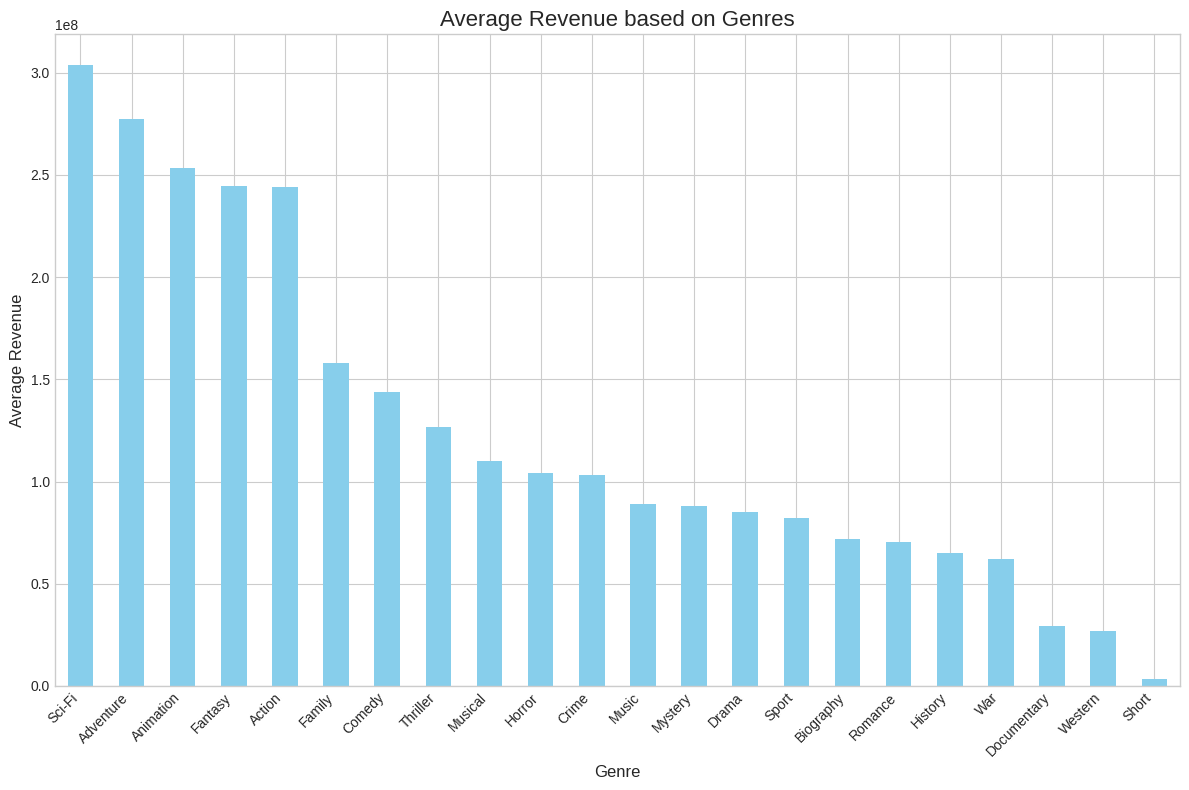

In [ ]:
import ast


# --- Bước 1: Xử lý cột 'genre' ---
ts['genre_list'] = ts['genre'].apply(ast.literal_eval)


df_exploded = ts.explode('genre_list')

# --- Bước 2: Tính toán Doanh thu theo Thể loại ---

day_columns = [str(i) for i in range(100)]
df_exploded['total_revenue'] = df_exploded[day_columns].sum(axis=1)


genre_revenue = df_exploded.groupby('genre_list')['total_revenue'].mean().sort_values(ascending=False)

# In kết quả ra màn hình
print("--- Average Revenue based on Genres ---")
print(genre_revenue.apply(lambda x: f"{x:,.0f}"))
print("-" * 50)


# --- Bước 3: Vẽ biểu đồ cột ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

# Vẽ biểu đồ cột với `kind='bar'`
genre_revenue.plot(kind='bar', color='skyblue')

# Thiết lập tiêu đề và nhãn
plt.title('Average Revenue based on Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Revenue', fontsize=12)

# Xoay nhãn ở trục X một góc 45 độ cho dễ đọc và căn lề phải
plt.xticks(rotation=45, ha='right')

# Tự động điều chỉnh layout cho vừa vặn
plt.tight_layout()

# Lưu biểu đồ thành một file ảnh
plt.savefig('genre_revenue_analysis.png')


Plot created successfully!


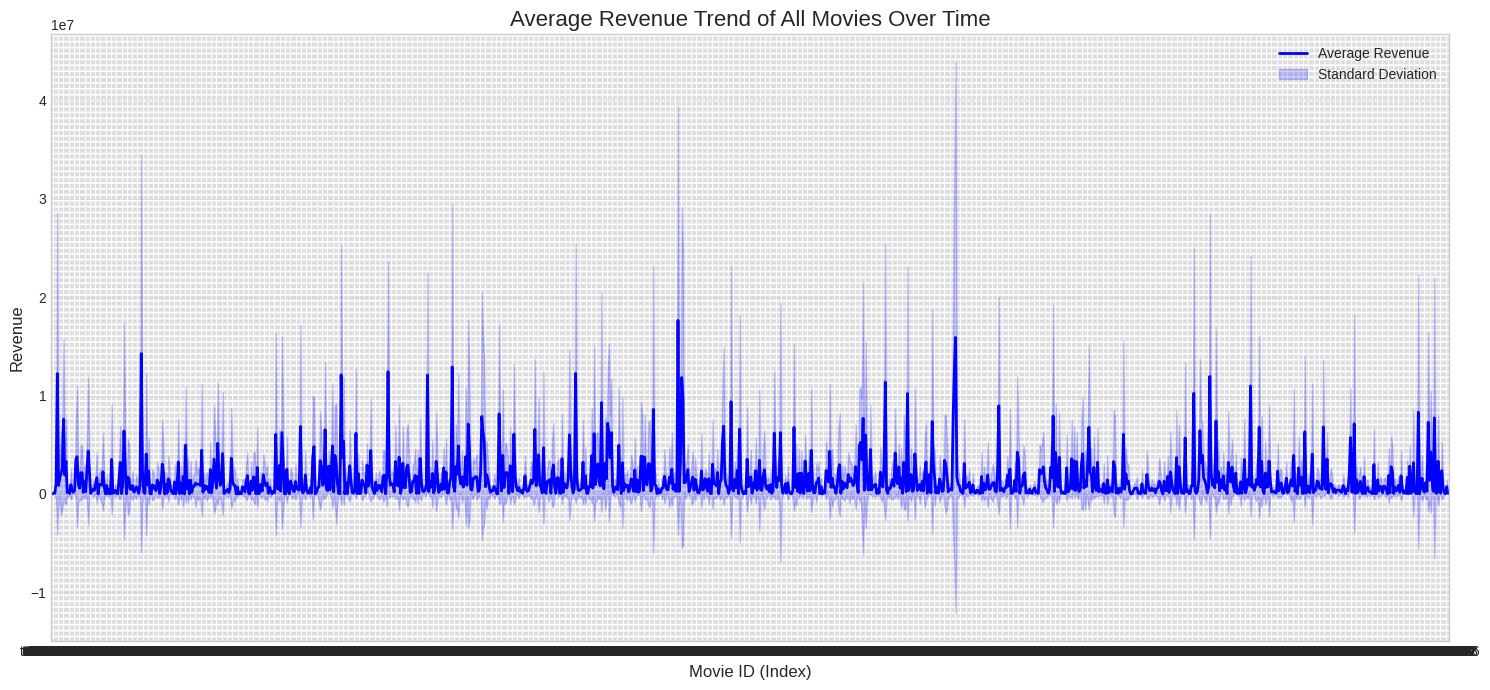

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    ts = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/imdb_ts.csv", index_col=0)

    numerical_cols = ts.drop(columns=['rating', 'genre', 'rating_category'])

    # --- Bước 3: Tính toán giá trị trung bình và độ lệch chuẩn ---
    mean_ts = numerical_cols.mean(axis=1)
    std_ts = numerical_cols.std(axis=1)

    # --- Bước 4: Vẽ biểu đồ ---
    plt.figure(figsize=(15, 7))

    # Plot the mean line
    plt.plot(mean_ts.index, mean_ts, label='Average Revenue', color='blue', linewidth=2)

    # Plot the standard deviation band
    plt.fill_between(mean_ts.index, mean_ts - std_ts, mean_ts + std_ts, color='blue', alpha=0.2, label='Standard Deviation')

    # Add plot details
    plt.title('Average Revenue Trend of All Movies Over Time', fontsize=16)
    plt.xlabel('Movie ID (Index)', fontsize=12)
    plt.ylabel('Revenue', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    # Set plot limits for better visibility
    plt.xlim(0, len(mean_ts.index) -1 ) # Adjust x-axis to fit all data points
    plt.tight_layout()

    # Save the plot to a file
    plt.savefig('average_timeseries_trend.png')

    print("Plot created successfully!")

except FileNotFoundError:
    print("Error: 'imdb_ts.csv' file not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [ ]:
# seaborn
#sns.lineplot(x=ts.index.astype("str"), y=ts)
#plt.xticks(ts.index.astype("str")[::20], rotation=45)
#plt.show()

In [ ]:
# sktime
#plot_series(ts)
#plt.show()

In [ ]:
ts.plot(kind="box")

In [ ]:
# how many values from each year?
#ts.index.strftime("%Y").value_counts().sort_index().plot(kind="bar")

## Missing Values

In [ ]:
ts

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,rating,genre,rating_category
id,,,,,,,,,,,,,,,,,,,,,
tt0062622,57057.0,65469.0,71642.0,73025.0,74060.0,49472.0,30258.0,28036.0,25824.0,32571.0,...,10709.0,11042.0,11388.0,11847.0,12404.0,13679.0,15056.0,8.3,"['Adventure', 'Sci-Fi']",High
tt0064816,1923.0,2422.0,2853.0,2947.0,3054.0,2844.0,2617.0,1998.0,1277.0,1449.0,...,637.0,734.0,857.0,785.0,724.0,713.0,699.0,7.1,"['Crime', 'Drama', 'Romance']",High
tt0088178,332925.0,302503.0,267264.0,261879.0,256608.0,196530.0,112728.0,117384.0,123024.0,119608.0,...,6784.0,7253.0,7776.0,9632.0,11212.0,9010.0,6431.0,8.7,"['Documentary', 'Music']",High
tt0145487,682857.0,407032.0,78058.0,81732.0,86772.0,83724.0,79940.0,39656.0,6974.0,7697.0,...,21094.0,10995.0,1586.0,1421.0,1177.0,970.0,802.0,7.4,"['Action', 'Adventure', 'Sci-Fi']",High
tt0359950,7813372.0,6274563.0,4781588.0,4655046.0,4535301.0,4650574.0,4758452.0,4069428.0,3471755.0,3108057.0,...,88635.0,68347.0,45367.0,28915.0,15494.0,16155.0,16853.0,7.3,"['Adventure', 'Comedy', 'Drama']",High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9731534,1077363.0,1061148.0,1043451.0,912840.0,738595.0,508118.0,296236.0,318113.0,341113.0,310422.0,...,2396.0,2425.0,2461.0,2223.0,1920.0,1991.0,2051.0,6.4,"['Horror', 'Mystery', 'Thriller']",Medium
tt9735462,56775.0,57750.0,58828.0,53549.0,48484.0,37340.0,19243.0,30804.0,55897.0,40874.0,...,739.0,618.0,488.0,636.0,883.0,904.0,920.0,6.3,"['Biography', 'Comedy', 'Drama']",Medium
tt9764362,3595005.0,3401235.0,3221227.0,2645775.0,2188725.0,1681250.0,1030698.0,1138724.0,1290788.0,1204996.0,...,345246.0,257388.0,182883.0,165311.0,144119.0,128009.0,111756.0,7.2,"['Comedy', 'Horror', 'Thriller']",High


In [ ]:
# Check for missing values in the dataset
missing_values = ts.isna().sum()

# Display the count of missing values for each column
missing_values

,0
0,0
1,0
2,0
3,0
4,0
...,...
98,0
99,0
rating,0
genre,0


## Anomalies

In [ ]:
from sktime.transformations.series.func_transform import FunctionTransformer

### Hampel Filter

In [ ]:
from sktime.transformations.series.outlier_detection import HampelFilter

In [ ]:
import pandas as pd
import numpy as np

def hampel_filter_for_row(data_series, window_size=5, n_sigmas=3):
    outlier_indices = []
    # Chuyển đổi Series thành mảng NumPy để xử lý nhanh hơn
    data = data_series.values
    # Hằng số 1.4826 là yếu tố tỷ lệ để làm cho MAD trở thành một ước lượng không chệch
    # của độ lệch chuẩn cho dữ liệu phân phối chuẩn.
    k = 1.4826

    # Lặp qua từng điểm dữ liệu
    for i in range(len(data)):
        # Xác định ranh giới của cửa sổ
        start = max(0, i - window_size // 2)
        end = min(len(data), i + window_size // 2 + 1)
        window = data[start:end]

        # Tính toán trung vị và MAD của cửa sổ
        median = np.median(window)
        mad = np.median(np.abs(window - median))
        sigma = k * mad

        # Kiểm tra xem điểm dữ liệu có phải là ngoại lai không
        # Điều kiện sigma > 0 để tránh chia cho không
        if np.abs(data[i] - median) > (n_sigmas * sigma) and sigma > 0:
            outlier_indices.append(i)

    return outlier_indices

# 2. Bỏ 3 cột cuối cùng
ts_processed = ts.iloc[:, :-3]

# 3. Đặt cột 'id' làm chỉ mục để dễ dàng xác định từng bộ phim
#ts_processed = ts_processed.set_index('id')

# 4. Áp dụng bộ lọc Hampel cho từng dòng (từng bộ phim)
outliers = {}
# df_processed.iterrows() lặp qua mỗi dòng của DataFrame
for movie_id, row in ts_processed.iterrows():
    # Gọi hàm lọc cho mỗi dòng
    outlier_days = hampel_filter_for_row(row, window_size=5, n_sigmas=3)
    # Nếu có ngoại lai, lưu chúng vào từ điển
    if outlier_days:
        outliers[movie_id] = outlier_days

# 5. Chuyển đổi từ điển kết quả thành DataFrame để dễ nhìn hơn
outliers_ts = pd.DataFrame(list(outliers.items()), columns=['Movie ID', 'Outlier Days'])

# 6. Lưu kết quả ra tệp CSV
#outliers_ts.to_csv('hampel_filter_outliers.csv', index=False)

# In thông báo và xem trước kết quả
#print("Đã xử lý xong! Các ngày có doanh thu bất thường cho mỗi bộ phim được lưu trong tệp 'hampel_filter_outliers.csv'.")
#print("\nXem trước 5 dòng đầu của kết quả:")

In [ ]:
outliers_ts

,Movie ID,Outlier Days
0,tt0088178,"[71, 86]"
1,tt0783640,[80]
2,tt0884732,[59]
3,tt10059518,[67]
4,tt10195452,[80]
...,...,...
136,tt8884430,[3]
137,tt9114286,[86]
138,tt9116358,[56]
139,tt9426210,[77]


In [ ]:
outliers_ts.to_csv('hampel_filter_outliers.csv', index=False)

In [ ]:
# 6. Xác định đường dẫn và tên tệp
output_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/hampel_filter_outliers.csv'

# 7. Lưu DataFrame vào tệp CSV tại đường dẫn đã chỉ định
outliers_ts.to_csv(output_path, index=False)

/content/hampel_filter_outliers.csv

### Grubbs Test

In [ ]:
from scipy import stats

In [ ]:
import pandas as pd
import numpy as np
# Cần thư viện SciPy để tính toán giá trị t-critical
from scipy.stats import t

def grubbs_test_for_row(data_series, alpha=0.05):
    # Làm việc trên một bản sao để không làm thay đổi dữ liệu gốc
    data = data_series.copy()
    outlier_indices = []

    while True:
        n = len(data)
        if n < 3:
            break

        mean_val = np.mean(data)
        std_dev = np.std(data, ddof=1)

        # Tránh lỗi chia cho 0 nếu tất cả các giá trị còn lại đều giống nhau
        if std_dev == 0:
            break

        abs_diff = np.abs(data - mean_val)
        max_diff_idx = abs_diff.idxmax()

        g_statistic = abs_diff[max_diff_idx] / std_dev

        t_crit_val = t.ppf(1 - alpha / (2 * n), n - 2)
        g_critical = ((n - 1) / np.sqrt(n)) * np.sqrt(t_crit_val**2 / (n - 2 + t_crit_val**2))

        if g_statistic > g_critical:
            # === PHẦN SỬA LỖI QUAN TRỌNG ===
            # Chuyển đổi trực tiếp tên cột (ví dụ: '59') thành số nguyên.
            # Đây chính là số thứ tự ngày chính xác.
            outlier_day = int(max_diff_idx)
            outlier_indices.append(outlier_day)

            # Loại bỏ điểm ngoại lai khỏi dữ liệu tạm thời để chuẩn bị cho vòng lặp tiếp theo
            data.drop(max_diff_idx, inplace=True)
            # Không cần dùng đến danh sách original_indices nữa.
        else:
            break

    return sorted(outlier_indices)

# --- ÁP DỤNG KIỂM ĐỊNH ĐÃ SỬA LỖI ---

# 4. Áp dụng Grubbs' Test cho từng dòng (từng bộ phim)
grubbs_outliers = {}
for movie_id, row in ts_processed.iterrows():
    numeric_row = pd.to_numeric(row, errors='coerce').dropna()
    if not numeric_row.empty:
        # Gọi hàm đã sửa lỗi
        outlier_days = grubbs_test_for_row(numeric_row, alpha=0.05)
        if outlier_days:
            grubbs_outliers[movie_id] = outlier_days

# --- LƯU VÀ HIỂN THỊ KẾT QUẢ ---

# 5. Chuyển đổi từ điển kết quả thành DataFrame
grubbs_outliers_ts = pd.DataFrame(list(grubbs_outliers.items()), columns=['Movie ID', 'Outlier Days (Grubbs Corrected)'])


In [ ]:
grubbs_outliers_ts

,Movie ID,Outlier Days (Grubbs Corrected)
0,tt0062622,"[0, 1, 2, 3, 4]"
1,tt0064816,[59]
2,tt0145487,"[0, 14, 28]"
3,tt0359950,"[0, 1]"
4,tt0369610,"[0, 1, 2, 3, 4]"
...,...,...
948,tt9682428,"[0, 1, 2, 3, 4, 16]"
949,tt9731534,"[0, 1, 2, 3, 4, 5, 16]"
950,tt9764362,"[0, 1, 2, 3]"
951,tt9784798,"[0, 1, 2, 3, 4, 5, 14, 15, 16, 17, 18, 30]"


In [ ]:
# 6. Xác định đường dẫn và tên tệp
output_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/grubbs_outliers.csv'

# 7. Lưu DataFrame vào tệp CSV tại đường dẫn đã chỉ định
grubbs_outliers_ts.to_csv(output_path, index=False)

### IQR-based

In [ ]:
import pandas as pd
import numpy as np

def find_global_iqr_outliers(data_series, multiplier=1.5):
    # Tính Q1 (phân vị 25%) và Q3 (phân vị 75%)
    q1 = data_series.quantile(0.25)
    q3 = data_series.quantile(0.75)

    # Tính khoảng tứ phân vị (IQR)
    iqr = q3 - q1

    # Xử lý trường hợp IQR = 0 (khi nhiều giá trị giống hệt nhau) để tránh lỗi
    if iqr == 0:
        return []

    # Xác định ngưỡng trên và ngưỡng dưới để phát hiện ngoại lai
    lower_bound = q1 - (multiplier * iqr)
    upper_bound = q3 + (multiplier * iqr)

    # Tìm tất cả các điểm nằm ngoài ngưỡng
    outliers = data_series[(data_series < lower_bound) | (data_series > upper_bound)]

    # Trả về chỉ số (số thứ tự ngày) của các điểm ngoại lai
    return [int(index) for index in outliers.index]

# 4. Áp dụng hàm tìm ngoại lai cho từng dòng (từng bộ phim)
global_iqr_outliers = {}
for movie_id, row in ts_processed.iterrows():
    # Đảm bảo dữ liệu của dòng là kiểu số
    numeric_row = pd.to_numeric(row, errors='coerce').dropna()
    if not numeric_row.empty:
        outlier_days = find_global_iqr_outliers(numeric_row)
        if outlier_days:
            global_iqr_outliers[movie_id] = outlier_days

# --- LƯU VÀ HIỂN THỊ KẾT QUẢ ---

# 5. Chuyển đổi từ điển kết quả thành DataFrame
global_iqr_outliers_ts = pd.DataFrame(list(global_iqr_outliers.items()), columns=['Movie ID', 'Outlier Days (Global IQR)'])


In [ ]:
global_iqr_outliers_ts

,Movie ID,Outlier Days (Global IQR)
0,tt0062622,"[0, 1, 2, 3, 4]"
1,tt0064816,"[59, 74]"
2,tt0088178,"[0, 1, 14, 15, 16, 17]"
3,tt0145487,"[0, 1, 13, 14, 15, 27, 28, 29, 42, 43, 44, 57,..."
4,tt0359950,"[0, 1, 2, 3, 4, 5, 6, 7, 13, 14]"
...,...,...
1077,tt9731534,"[0, 1, 2, 3, 4, 5, 15, 16, 17]"
1078,tt9735462,"[0, 1, 2, 3, 4, 8]"
1079,tt9764362,"[0, 1, 2, 3, 4, 14, 15, 16]"
1080,tt9784798,"[0, 1, 2, 3, 4, 5, 14, 15, 16, 17, 18, 30]"


In [ ]:
# 6. Xác định đường dẫn và tên tệp
output_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/global_iqr_outliers_ts.csv'

# 7. Lưu DataFrame vào tệp CSV tại đường dẫn đã chỉ định
global_iqr_outliers_ts.to_csv(output_path, index=False)

## Slicing Window method for outliers

### Grub test

In [ ]:
# 2. Bỏ 3 cột cuối cùng
ts_processed = ts.iloc[:, :-3]

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import t

def grubbs_test_slicing_window(data_series, window_size=15, alpha=0.05):
    """
    Áp dụng kiểm định Grubbs theo phương pháp cửa sổ trượt (slicing window).

    Hàm này kiểm tra xem mỗi điểm có phải là outlier so với các điểm lân cận
    trong cửa sổ của nó hay không.
    """
    outlier_indices = []
    data = data_series.values  # Làm việc với mảng NumPy cho tốc độ
    original_indices = data_series.index # Giữ lại các chỉ số gốc (tên cột ngày)

    # Lặp qua từng điểm dữ liệu để lấy nó làm trung tâm của cửa sổ
    for i in range(len(data)):
        # 1. Xác định ranh giới của cửa sổ
        start = max(0, i - window_size // 2)
        end = min(len(data), i + window_size // 2 + 1)
        window = data[start:end]

        n = len(window)
        # Kiểm định Grubbs yêu cầu ít nhất 3 điểm dữ liệu
        if n < 3:
            continue

        # 2. Tính toán các giá trị thống kê CHO CỬA SỔ
        mean_val = np.mean(window)
        std_dev = np.std(window, ddof=1) # ddof=1 cho độ lệch chuẩn mẫu

        # Tránh lỗi chia cho 0 nếu tất cả giá trị trong cửa sổ giống nhau
        if std_dev == 0:
            continue

        # 3. Tính toán G-statistic cho điểm trung tâm (data[i])
        g_statistic = np.abs(data[i] - mean_val) / std_dev

        # 4. Tính toán giá trị G-critical cho kích thước cửa sổ hiện tại
        t_crit_val = t.ppf(1 - alpha / (2 * n), n - 2)
        g_critical = ((n - 1) / np.sqrt(n)) * np.sqrt(t_crit_val**2 / (n - 2 + t_crit_val**2))

        # 5. So sánh và xác định outlier
        if g_statistic > g_critical:
            # Nếu là outlier, thêm CHỈ SỐ GỐC vào danh sách
            outlier_indices.append(original_indices[i])

    # Trả về danh sách các chỉ số outlier duy nhất và đã được sắp xếp
    return sorted(list(set(outlier_indices)))

# --- ÁP DỤNG KIỂM ĐỊNH CỬA SỔ TRƯỢT ---

# Giả sử bạn có DataFrame 'ts_processed' từ trước
grubbs_slicing_outliers = {}
for movie_id, row in ts_processed.iterrows():
    # Bỏ qua các hàng trống
    if row.empty:
        continue

    # Gọi hàm kiểm định Grubbs với cửa sổ trượt
    # Bạn có thể điều chỉnh window_size và alpha ở đây
    outlier_days = grubbs_test_slicing_window(row, window_size=15, alpha=0.05)

    if outlier_days:
        grubbs_slicing_outliers[movie_id] = outlier_days

# Chuyển đổi từ điển kết quả thành DataFrame
grubbs_slicing_outliers_ts = pd.DataFrame(list(grubbs_slicing_outliers.items()), columns=['Movie ID', 'Outlier Days (Grubbs Slicing)'])

# In ra 5 dòng đầu tiên của kết quả
print("Kết quả phát hiện outlier bằng Grubbs' Test (Slicing Window):")
print(grubbs_slicing_outliers_ts.head())

Kết quả phát hiện outlier bằng Grubbs' Test (Slicing Window):
     Movie ID Outlier Days (Grubbs Slicing)
0   tt0064816                          [45]
1   tt0145487   [0, 14, 28, 43, 57, 72, 87]
2   tt0974015                          [76]
3  tt10545296                          [76]
4  tt10661180                          [89]


In [ ]:
# 6. Xác định đường dẫn và tên tệp
output_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/grubbs_slicing_outliers_ts.csv'

# 7. Lưu DataFrame vào tệp CSV tại đường dẫn đã chỉ định
grubbs_slicing_outliers_ts.to_csv(output_path, index=False)

### IQR

In [ ]:
import pandas as pd
import numpy as np

def find_slicing_iqr_outliers(data_series, window_size=15, multiplier=1.5):
    """
    Áp dụng phương pháp IQR theo cửa sổ trượt (slicing window).
    """
    outlier_indices = []
    # Chuyển đổi thành Series để dễ dàng sử dụng các hàm .quantile(), .index
    data = pd.Series(data_series.values, index=data_series.index)

    # Lặp qua từng điểm dữ liệu để lấy nó làm trung tâm
    for i in range(len(data)):
        # 1. Xác định ranh giới của cửa sổ
        start = max(0, i - window_size // 2)
        end = min(len(data), i + window_size // 2 + 1)

        # Lấy cửa sổ dữ liệu dưới dạng một Series mới
        window = data.iloc[start:end]

        # 2. Tính toán Q1, Q3, và IQR cho CỬA SỔ
        q1 = window.quantile(0.25)
        q3 = window.quantile(0.75)
        iqr = q3 - q1

        # Bỏ qua nếu các giá trị trong cửa sổ giống hệt nhau
        if iqr == 0:
            continue

        # 3. Xác định ngưỡng trên và dưới cho CỬA SỔ
        lower_bound = q1 - (multiplier * iqr)
        upper_bound = q3 + (multiplier * iqr)

        # 4. Kiểm tra xem ĐIỂM TRUNG TÂM (data.iloc[i]) có nằm ngoài ngưỡng không
        point_to_check = data.iloc[i]
        if point_to_check < lower_bound or point_to_check > upper_bound:
            # Nếu là outlier, thêm chỉ số gốc (tên cột ngày) vào danh sách
            outlier_indices.append(data.index[i])

    # Trả về danh sách các chỉ số outlier duy nhất và đã được sắp xếp
    return sorted([int(idx) for idx in list(set(outlier_indices))])

# --- ÁP DỤNG HÀM IQR CỬA SỔ TRƯỢT ---

# Giả sử bạn có DataFrame 'ts_processed' từ trước
slicing_iqr_outliers = {}
for movie_id, row in ts_processed.iterrows():
    numeric_row = pd.to_numeric(row, errors='coerce').dropna()
    if not numeric_row.empty:
        # Gọi hàm IQR với cửa sổ trượt
        # Bạn có thể điều chỉnh window_size và multiplier
        outlier_days = find_slicing_iqr_outliers(numeric_row, window_size=15, multiplier=1.5)
        if outlier_days:
            slicing_iqr_outliers[movie_id] = outlier_days

# Chuyển đổi từ điển kết quả thành DataFrame
slicing_iqr_outliers_ts = pd.DataFrame(list(slicing_iqr_outliers.items()), columns=['Movie ID', 'Outlier Days (Slicing IQR)'])

# In ra 5 dòng đầu tiên của kết quả
print("Kết quả phát hiện outlier bằng IQR (Slicing Window):")
print(slicing_iqr_outliers_ts.head())

Kết quả phát hiện outlier bằng IQR (Slicing Window):
    Movie ID                         Outlier Days (Slicing IQR)
0  tt0064816                                           [45, 46]
1  tt0145487  [0, 1, 13, 14, 15, 27, 28, 29, 42, 43, 44, 56,...
2  tt0359950                                     [0, 1, 48, 49]
3  tt0455944                                           [74, 89]
4  tt0490215                                                [0]


In [ ]:
# 6. Xác định đường dẫn và tên tệp
output_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/slicing_iqr_outliers_ts.csv'

# 7. Lưu DataFrame vào tệp CSV tại đường dẫn đã chỉ định
slicing_iqr_outliers_ts.to_csv(output_path, index=False)

## Defining final outliers

In [ ]:
global_iqr_outliers_ts = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/global_iqr_outliers_ts.csv", index_col=0)

In [ ]:
grubbs_slicing_outliers_ts = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/grubbs_slicing_outliers_ts.csv", index_col=0)

In [ ]:
hampel_filter_outliers = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/hampel_filter_outliers.csv", index_col=0)

In [ ]:
slicing_iqr_outliers_ts = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/slicing_iqr_outliers_ts.csv", index_col=0)

In [ ]:
grubbs_outliers = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/grubbs_outliers.csv", index_col=0)

In [ ]:
import pandas as pd
import ast
from collections import Counter
# 1. Đưa tất cả các DataFrame đã tải vào một danh sách
list_of_dfs = [
    global_iqr_outliers_ts,
    grubbs_slicing_outliers_ts,
    hampel_filter_outliers,
    slicing_iqr_outliers_ts,
    grubbs_outliers
]

# 2. Hàm để chuyển đổi chuỗi '[1, 2]' thành danh sách số
def parse_outlier_string(s):
    """Chuyển đổi chuỗi đại diện cho danh sách thành một danh sách Python thực sự."""
    try:
        return ast.literal_eval(str(s))
    except (ValueError, SyntaxError):
        return []

# 3. Tổng hợp tất cả các outlier từ các DataFrame
all_outliers = {}
print("Bắt đầu tổng hợp dữ liệu từ 5 DataFrame...")

for df in list_of_dfs:
    # Đặt lại chỉ mục nếu 'Movie ID' chưa phải là một cột
    df_reset = df.reset_index()
    # Lấy tên cột đầu tiên và thứ hai
    id_col_name = df_reset.columns[0]
    outlier_col_name = df_reset.columns[1]

    for index, row in df_reset.iterrows():
        movie_id = row[id_col_name]
        outlier_days = parse_outlier_string(row[outlier_col_name])

        if movie_id not in all_outliers:
            all_outliers[movie_id] = []

        all_outliers[movie_id].extend(outlier_days)

print("Tổng hợp dữ liệu hoàn tất.\n")

# 4. Thực hiện "Majority Voting"
final_outliers = {}
VOTE_THRESHOLD = 3  # Ngưỡng: ít nhất 3/5 phương pháp phải đồng ý

print(f"Bắt đầu bỏ phiếu với ngưỡng là {VOTE_THRESHOLD}...")
for movie_id, days in all_outliers.items():
    vote_counts = Counter(days)

    # Lọc những ngày có số phiếu >= ngưỡng
    official_outliers = [day for day, count in vote_counts.items() if count >= VOTE_THRESHOLD]

    if official_outliers:
        final_outliers[movie_id] = sorted(official_outliers)

print("Bỏ phiếu hoàn tất.\n")

# 5. Lưu kết quả cuối cùng
if final_outliers:
    final_outliers_df = pd.DataFrame(list(final_outliers.items()), columns=['Movie ID', 'Official Outlier Days'])
    output_filename = 'final_outliers_majority_vote.csv'
    final_outliers_df.to_csv(output_filename, index=False)

    print(f"✅ Hoàn thành! Kết quả đã được lưu vào tệp '{output_filename}'.")
    print("\nXem trước kết quả:")
    print(final_outliers_df.head())
else:
    print("Không tìm thấy outlier nào đạt đủ ngưỡng biểu quyết.")

Bắt đầu tổng hợp dữ liệu từ 5 DataFrame...
Tổng hợp dữ liệu hoàn tất.

Bắt đầu bỏ phiếu với ngưỡng là 3...
Bỏ phiếu hoàn tất.

✅ Hoàn thành! Kết quả đã được lưu vào tệp 'final_outliers_majority_vote.csv'.

Xem trước kết quả:
     Movie ID Official Outlier Days
0   tt0145487           [0, 14, 28]
1   tt0359950                [0, 1]
2   tt0993846                   [0]
3  tt10473036                  [16]
4   tt1109624                  [30]


In [ ]:
# 6. Xác định đường dẫn và tên tệp
output_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/final_outliers_majority_vote.csv'

# 7. Lưu DataFrame vào tệp CSV tại đường dẫn đã chỉ định
final_outliers_df.to_csv(output_path, index=False)

## Plot final outliers

In [ ]:
outliers_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/final_outliers_majority_vote.csv", index_col=0)

In [ ]:
# Tải dữ liệu outlier
#outliers_df = pd.read_csv('final_outliers_majority_vote.csv')

# IN RA TÊN CÁC CỘT ĐỂ KIỂM TRA
print("Các cột trong file outlier là:")
print(outliers_df.columns)

Các cột trong file outlier là:
Index(['Official Outlier Days'], dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast # Thư viện để chuyển đổi chuỗi thành danh sách một cách an toàn

# Chỉ lấy các cột chứa dữ liệu time series (từ ngày 0 đến 99)
ts_data = ts.loc[:, '0':'99']

# Chuyển đổi tên các cột ngày (đang là chuỗi) thành số nguyên
ts_data.columns = range(100)

# Hàm để chuyển đổi chuỗi "[0, 1, 2]" thành danh sách [0, 1, 2]
def parse_outlier_days(days_str):
    """
    Hàm này sử dụng ast.literal_eval để chuyển đổi một chuỗi
    biểu diễn một danh sách thành đối tượng danh sách Python thực sự.
    Đây là cách an toàn hơn là sử dụng eval().
    """
    try:
        # Chuyển đổi chuỗi thành đối tượng Python (list, int, v.v.)
        evaluated = ast.literal_eval(days_str)
        # Đảm bảo kết quả luôn là một danh sách
        if isinstance(evaluated, int):
            return [evaluated] # Nếu là một số, trả về danh sách chứa số đó
        return evaluated
    except (ValueError, SyntaxError):
        # Trả về danh sách rỗng nếu chuỗi không hợp lệ
        return []

# --- Bước 3: Lặp qua các phim có outlier và vẽ biểu đồ ---
print("Bắt đầu vẽ biểu đồ cho các phim có outlier...")

# Lặp qua từng dòng trong DataFrame chứa thông tin outlier
for movie_id, row in outliers_df.iterrows():
    # Lấy chuỗi ngày outlier từ cột 'Official Outlier Days'
    outlier_days_str = row['Official Outlier Days']

    # Kiểm tra xem ID phim có tồn tại trong dữ liệu time series không
    if movie_id not in ts_data.index:
        print(f"Không tìm thấy dữ liệu cho phim {movie_id}. Bỏ qua.")
        continue

    # Lấy dữ liệu time series của phim hiện tại
    movie_ts = ts_data.loc[movie_id]

    # Chuyển đổi chuỗi ngày outlier thành danh sách các số nguyên
    outlier_days = parse_outlier_days(outlier_days_str)

    # Lấy giá trị doanh thu tại các ngày outlier
    # Chúng ta thêm kiểm tra để đảm bảo ngày outlier có trong dữ liệu
    valid_outlier_days = [day for day in outlier_days if day in movie_ts.index]
    outlier_values = movie_ts[valid_outlier_days]

   # Bắt đầu vẽ
    plt.figure(figsize=(15, 7))
    plt.plot(movie_ts.index, movie_ts.values, label='Doanh thu hàng ngày', color='royalblue', zorder=1)
    plt.scatter(valid_outlier_days, outlier_values, color='red', marker='x', s=100, linewidth=2, label='Ngày ngoại lệ (Outlier)', zorder=2)

    # Định dạng cho biểu đồ
    plt.title(f'Doanh thu Time Series và Outliers của Phim: {movie_id}', fontsize=16)
    plt.xlabel('Ngày (tính từ ngày phát hành)', fontsize=12)
    plt.ylabel('Doanh thu', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlim(-1, 100)
    plt.show()

print("Hoàn thành!")

Output hidden; open in https://colab.research.google.com to view.

ĐỀ XUẤT NGÀY NÀO K PHẢI Ở ĐỈNH THÌ LOẠI ĐI? CHẮC KHAONRG CHỤC NAGYF THÔI

### Replacing Anomalies

In [ ]:
import pandas as pd
import numpy as np
import ast

try:
    outliers_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/final_outliers_majority_vote.csv")
    print("Đọc tệp thành công!")

    # 2. Tách DataFrame thành 2 phần: Dữ liệu chuỗi thời gian và Siêu dữ liệu
    meta_cols = ['rating', 'genre', 'rating_category']

    # Lấy danh sách các cột là chuỗi thời gian (loại bỏ các cột siêu dữ liệu nếu có)
    ts_cols = [col for col in ts.columns if col not in meta_cols]

    # Tạo 2 DataFrame riêng biệt
    ts_data = ts[ts_cols] # Chỉ chứa các cột '0', '1', '2', ...
    ts_meta = ts[meta_cols] # Chỉ chứa rating, genre, rating_category

    # Tạo bản sao của phần dữ liệu chuỗi thời gian để xử lý
    ts_data_imputed = ts_data.copy()

    # 3. Chuyển đổi các cột dữ liệu chuỗi thời gian sang dạng số
    print("\nChuyển đổi các cột chuỗi thời gian sang dạng số...")
    for col in ts_data_imputed.columns:
        ts_data_imputed[col] = pd.to_numeric(ts_data_imputed[col], errors='coerce')
    print("Chuyển đổi thành công!")

    # 4. Thay thế các giá trị outlier bằng NaN (chỉ trên phần dữ liệu số)
    print("\nBắt đầu thay thế các giá trị outlier bằng NaN...")
    outliers_replaced_count = 0
    for index, row in outliers_df.iterrows():
        movie_id = row['Movie ID']

        if movie_id in ts_data_imputed.index:
            try:
                outlier_days = ast.literal_eval(row['Official Outlier Days'])
                outlier_cols = [str(day) for day in outlier_days]

                valid_cols = [col for col in outlier_cols if col in ts_data_imputed.columns]
                ts_data_imputed.loc[movie_id, valid_cols] = np.nan
                outliers_replaced_count += len(valid_cols)
            except (ValueError, SyntaxError):
                print(f"Cảnh báo: Không thể đọc danh sách outlier cho ID {movie_id}. Bỏ qua.")
                continue

    print(f"Đã thay thế tổng cộng {outliers_replaced_count} điểm dữ liệu outlier.")

    # 5. Lấp đầy các giá trị NaN bằng ffill và bfill
    print("\nBắt đầu lấp đầy các giá trị bị thiếu bằng ffill/bfill...")
    # axis=1 để thực hiện trên từng hàng
    ts_data_imputed = ts_data_imputed.ffill(axis=1).bfill(axis=1)
    print("Lấp đầy hoàn tất!")

    # 6. Ghép phần dữ liệu đã làm sạch và phần siêu dữ liệu lại với nhau
    ts_final = pd.concat([ts_data_imputed, ts_meta], axis=1)

    # 7. Lưu DataFrame cuối cùng
    output_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/ts_final.csv'

    ts_final.to_csv(output_path, index=False)

    print(f"\n✅ Hoàn thành! Dữ liệu cuối cùng đã được lưu vào tệp '{ts_final}'.")

    print("\nXem trước dữ liệu cuối cùng:")
    print(ts_final.head())

except FileNotFoundError as e:
    print(f"LỖI: Không tìm thấy tệp! Vui lòng đảm bảo tệp '{e.filename}' nằm trong cùng thư mục.")
except Exception as e:
    print(f"Đã xảy ra lỗi không mong muốn: {e}")

Đọc tệp thành công!

Chuyển đổi các cột chuỗi thời gian sang dạng số...
Chuyển đổi thành công!

Bắt đầu thay thế các giá trị outlier bằng NaN...
Đã thay thế tổng cộng 77 điểm dữ liệu outlier.

Bắt đầu lấp đầy các giá trị bị thiếu bằng ffill/bfill...
Lấp đầy hoàn tất!

✅ Hoàn thành! Dữ liệu cuối cùng đã được lưu vào tệp '                   0          1          2          3          4          5  \
id                                                                            
tt0062622    57057.0    65469.0    71642.0    73025.0    74060.0    49472.0   
tt0064816     1923.0     2422.0     2853.0     2947.0     3054.0     2844.0   
tt0088178   332925.0   302503.0   267264.0   261879.0   256608.0   196530.0   
tt0145487   407032.0   407032.0    78058.0    81732.0    86772.0    83724.0   
tt0359950  4781588.0  4781588.0  4781588.0  4655046.0  4535301.0  4650574.0   
...              ...        ...        ...        ...        ...        ...   
tt9731534  1077363.0  1061148.0  1043451.0   9

# NOMALIZATION

In [ ]:
from sktime.transformations.series.adapt import TabularToSeriesAdaptor

## Min max nomalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Import thư viện pandas để làm việc với dữ liệu dạng bảng (DataFrame)
import pandas as pd

# 1. Đọc dữ liệu từ file CSV của bạn
# Sử dụng khối try-except để bắt lỗi nếu không tìm thấy file


In [ ]:
ts_normalized = ts.copy()

# Xác định các cột chứa dữ liệu doanh thu
revenue_cols = [str(i) for i in range(100)]

# Kiểm tra để đảm bảo các cột này thực sự tồn tại trong DataFrame
existing_revenue_cols = [col for col in revenue_cols if col in ts.columns]
if not existing_revenue_cols:
    raise ValueError("Không tìm thấy các cột doanh thu được đặt tên từ '0' đến '99'.")


# --- KHỐI 2: ĐỊNH NGHĨA HÀM ---
# Hàm này được định nghĩa ở cấp cao nhất (không thụt lề)
def min_max_scale_row(row):
    # Các dòng bên trong hàm phải thụt vào 4 khoảng trắng
    numeric_row = pd.to_numeric(row, errors='coerce').dropna()
    if numeric_row.empty:
        return row # Trả về hàng gốc nếu không có dữ liệu số

    # Tìm giá trị nhỏ nhất và lớn nhất trong hàng
    min_val = numeric_row.min()
    max_val = numeric_row.max()

    # Xử lý trường hợp đặc biệt khi tất cả các giá trị bằng nhau
    if max_val == min_val:
        # Lệnh return này nằm trong khối if, nên phải thụt vào thêm
        return row.apply(lambda x: 0.0 if pd.notnull(x) else x)

    # Áp dụng công thức Min-Max, lệnh return này nằm ngoài khối if ở trên
    return (row - min_val) / (max_val - min_val)


# --- KHỐI 3: ÁP DỤNG HÀM VÀ LƯU KẾT QUẢ ---
# Các lệnh này được gọi ở cấp cao nhất, sau khi hàm đã được định nghĩa
# Áp dụng hàm chuẩn hóa lên các cột doanh thu
ts_normalized[existing_revenue_cols] = ts_normalized[existing_revenue_cols].apply(min_max_scale_row, axis=1)

output_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/ts_minmax_normalized.csv'

ts_normalized.to_csv(output_path, index=False)

# In thông báo và kết quả
print("Đây là 5 dòng đầu tiên của dữ liệu sau khi chuẩn hóa:")
print(ts_normalized.head())

Đây là 5 dòng đầu tiên của dữ liệu sau khi chuẩn hóa:
                  0         1         2         3         4         5  \
id                                                                      
tt0062622  0.744439  0.870874  0.963657  0.984444  1.000000  0.630433   
tt0064816  0.435758  0.586970  0.717576  0.746061  0.778485  0.714848   
tt0088178  0.855075  0.775433  0.683180  0.669083  0.655284  0.498005   
tt0145487  0.844239  0.502826  0.095627  0.100174  0.106413  0.102640   
tt0359950  1.000000  0.802663  0.611204  0.594976  0.579620  0.594403   

                  6         7         8         9  ...        93        94  \
id                                                 ...                       
tt0062622  0.341640  0.308243  0.274995  0.376405  ...  0.047812  0.052817   
tt0064816  0.646061  0.458485  0.240000  0.292121  ...  0.046061  0.075455   
tt0088178  0.278619  0.290808  0.305573  0.296630  ...  0.001267  0.002495   
tt0145487  0.097956  0.048093  0.007640  0.0

Bắt đầu vẽ 5 biểu đồ so sánh...


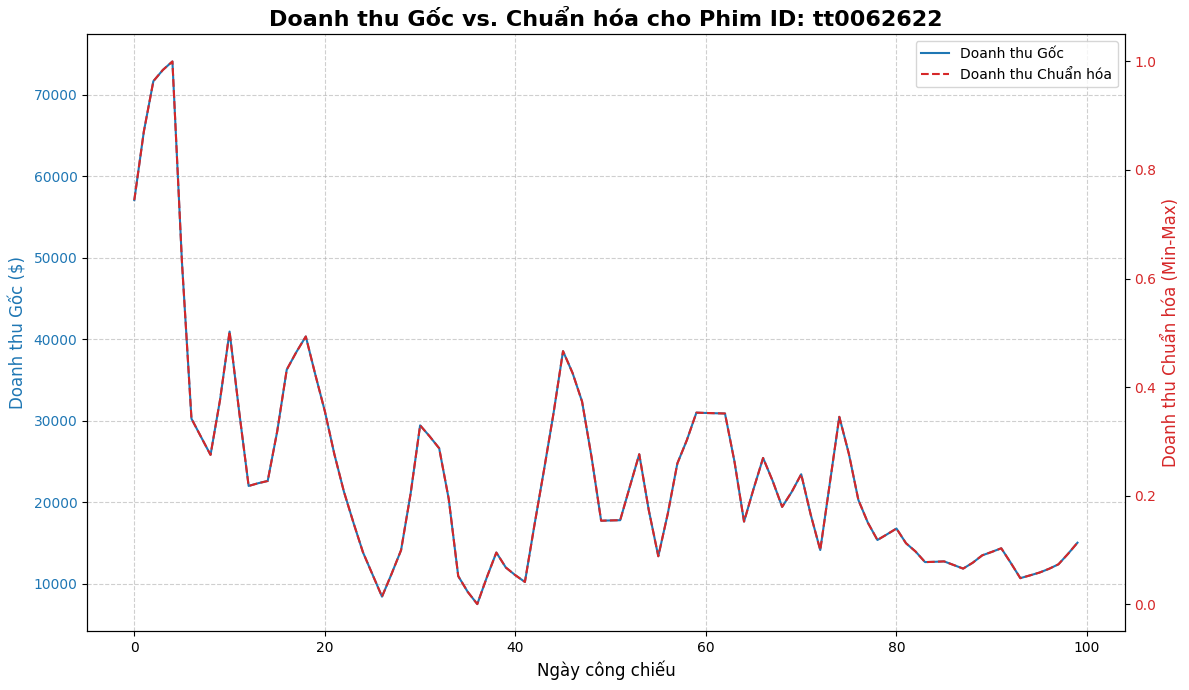

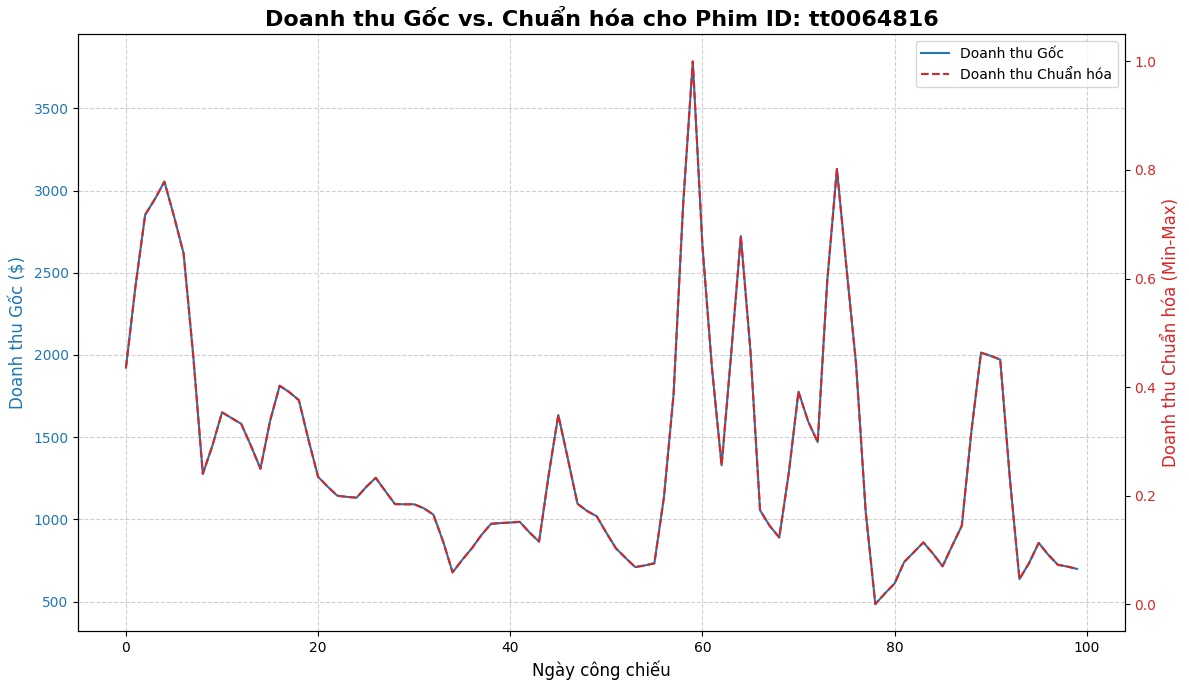

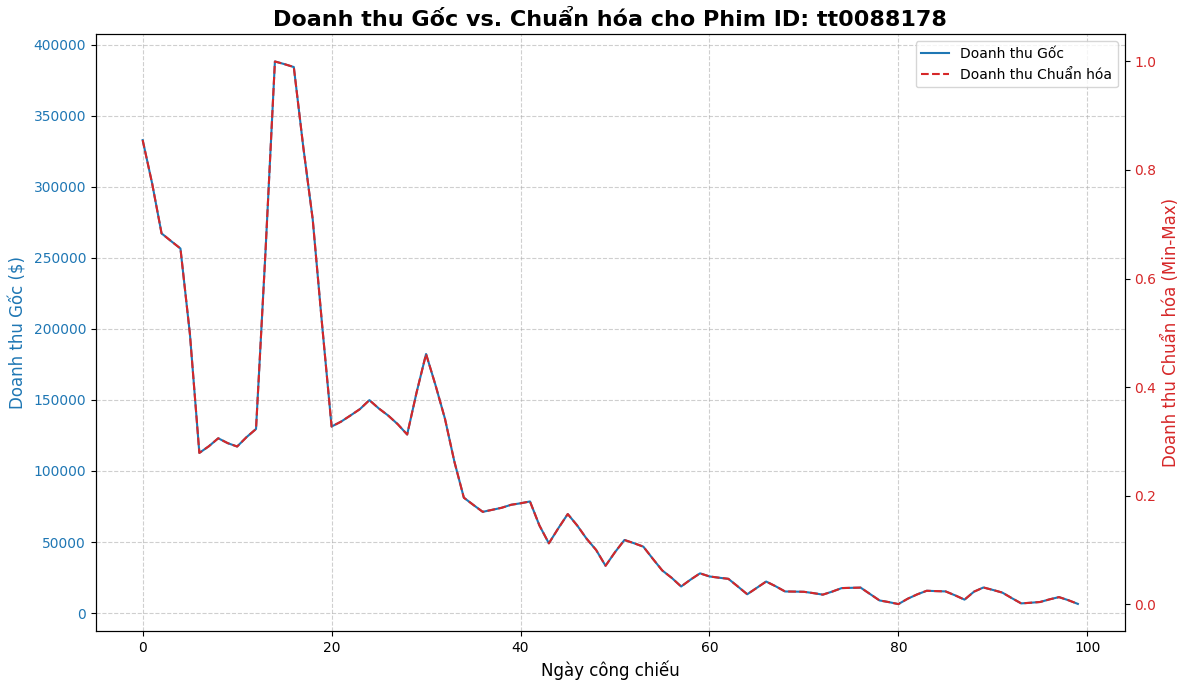

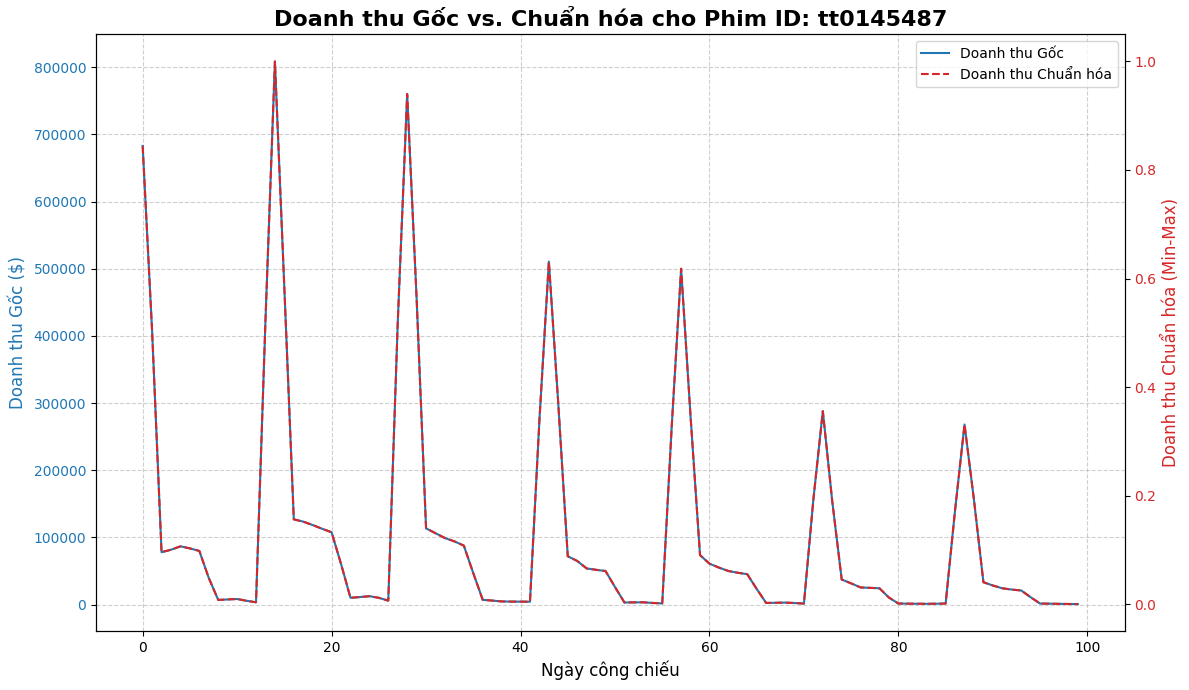

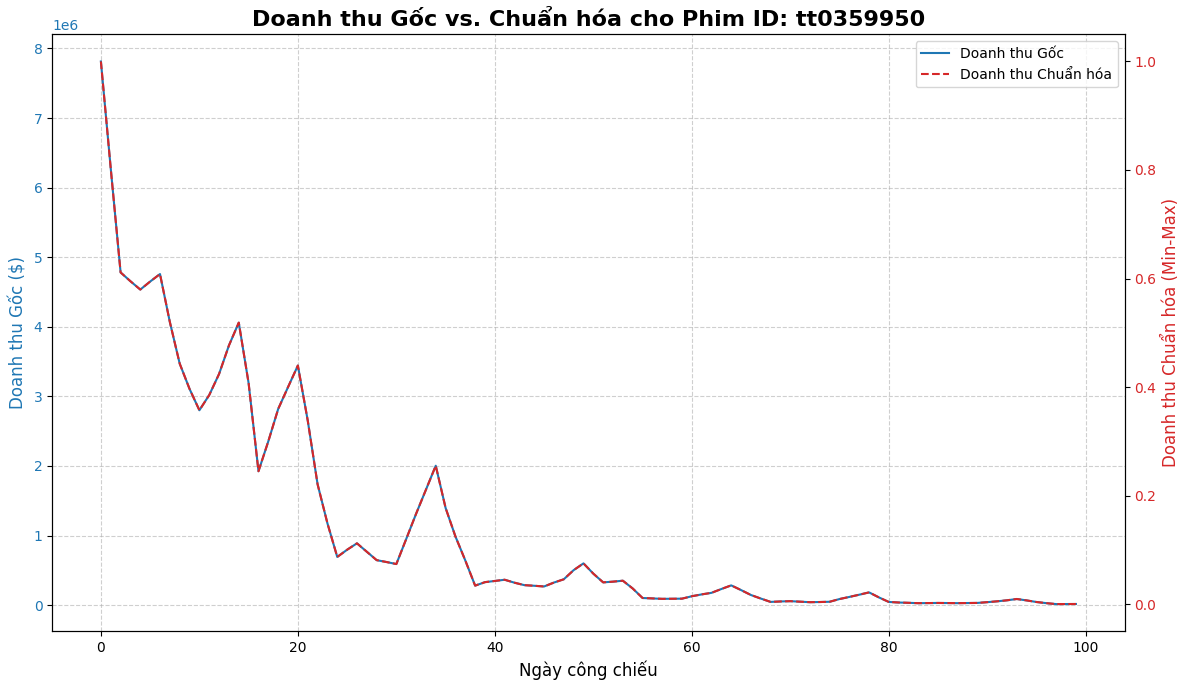

Hoàn thành! Đã vẽ và lưu thành công 5 biểu đồ.


In [ ]:
# Import các thư viện cần thiết cho việc vẽ biểu đồ
import matplotlib.pyplot as plt
import numpy as np

# --- GIẢ ĐỊNH BẠN ĐÃ CÓ 2 DATAFRAME NÀY ---
# ts: Chứa dữ liệu gốc từ file imdb_ts.csv
# ts_normalized: Chứa dữ liệu đã được chuẩn hóa bằng Min-Max Scaler

# --- BƯỚC VẼ BIỂU ĐỒ ---

# Xác định các cột doanh thu và số ngày để vẽ
revenue_cols = [str(i) for i in range(100)]
days = np.arange(len(revenue_cols))

# Số lượng phim cần vẽ
num_plots = 5

print(f"Bắt đầu vẽ {num_plots} biểu đồ so sánh...")

# Bắt đầu vòng lặp để vẽ cho từng bộ phim
for i in range(num_plots):
    # Lấy ID của bộ phim từ DataFrame gốc
    #movie_id = ts.loc[i, 'id']
    # Lấy ID từ chỉ mục của hàng thứ i
    movie_id = ts.index[i]
    # Lấy dữ liệu doanh thu tương ứng từ hai DataFrame
    original_revenue = ts.iloc[i][revenue_cols].astype(float)
    normalized_revenue = ts_normalized.iloc[i][revenue_cols].astype(float)

    # Tạo một không gian vẽ mới cho mỗi biểu đồ
    plt.figure(figsize=(12, 7))

    # Tạo trục tung thứ nhất (bên trái) cho Doanh thu Gốc
    ax1 = plt.gca()
    color = 'tab:blue'
    ax1.set_xlabel('Ngày công chiếu', fontsize=12)
    ax1.set_ylabel('Doanh thu Gốc ($)', color=color, fontsize=12)
    ax1.plot(days, original_revenue, color=color, label='Doanh thu Gốc')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True, linestyle='--', alpha=0.6)

    # Tạo trục tung thứ hai (bên phải) cho Doanh thu Chuẩn hóa
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Doanh thu Chuẩn hóa (Min-Max)', color=color, fontsize=12)
    ax2.plot(days, normalized_revenue, color=color, linestyle='--', label='Doanh thu Chuẩn hóa')
    ax2.tick_params(axis='y', labelcolor=color)

    # Đặt tiêu đề và chú thích cho biểu đồ
    plt.title(f'Doanh thu Gốc vs. Chuẩn hóa cho Phim ID: {movie_id}', fontsize=16, fontweight='bold')
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

    # Tự động điều chỉnh bố cục
    plt.tight_layout()

    # Lưu biểu đồ vào file ảnh
    output_filename = f'comparison_plot_{movie_id}.png'
    plt.savefig(output_filename)
    plt.show()
    plt.close() # Đóng hình vẽ để giải phóng bộ nhớ

print(f"Hoàn thành! Đã vẽ và lưu thành công {num_plots} biểu đồ.")

## Z-score nomalization

In [ ]:
# --- BƯỚC 2: CHUẨN HÓA DỮ LIỆU THEO Z-SCORE ---

# Tạo một bản sao để lưu dữ liệu đã chuẩn hóa
ts_zscore = ts.copy()

# Xác định các cột doanh thu
revenue_cols = [str(i) for i in range(100)]
existing_revenue_cols = [col for col in revenue_cols if col in ts_zscore.columns]

if not existing_revenue_cols:
    raise ValueError("Không tìm thấy các cột doanh thu trong DataFrame.")

# Định nghĩa hàm để chuẩn hóa Z-score cho từng hàng
def z_score_scale_row(row):
    mean_val = row.mean()
    std_val = row.std()

    # Tránh lỗi chia cho 0
    if std_val == 0:
        return row - mean_val

    return (row - mean_val) / std_val

# Áp dụng hàm chuẩn hóa
ts_zscore[existing_revenue_cols] = ts_zscore[existing_revenue_cols].apply(z_score_scale_row, axis=1)

output_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/imdb_ts_zscore_normalized.csv'

ts_zscore.to_csv(output_path, index=False)

print("\n5 dòng đầu của dữ liệu sau khi chuẩn hóa:")
print(ts_zscore.head())


5 dòng đầu của dữ liệu sau khi chuẩn hóa:
                  0         1         2         3         4         5  \
id                                                                      
tt0062622  2.482691  3.103747  3.559498  3.661604  3.738018  1.922693   
tt0064816  0.755653  1.473569  2.093652  2.228891  2.382833  2.080704   
tt0088178  2.558031  2.242591  1.877203  1.821367  1.766713  1.143775   
tt0145487  3.420437  1.788017 -0.158955 -0.137211 -0.107383 -0.125422   
tt0359950  4.115150  3.170309  2.253611  2.175913  2.102388  2.173167   

                  6         7         8         9  ...        93        94  \
id                                                 ...                       
tt0062622  0.504129  0.340080  0.176768  0.674897  ... -0.939168 -0.914582   
tt0064816  1.754117  0.863556 -0.173753  0.073705  ... -1.094527 -0.954972   
tt0088178  0.274846  0.323123  0.381604  0.346184  ... -0.823669 -0.818806   
tt0145487 -0.147817 -0.386230 -0.579652 -0.575373  ... 

Bắt đầu vẽ 5 biểu đồ so sánh...


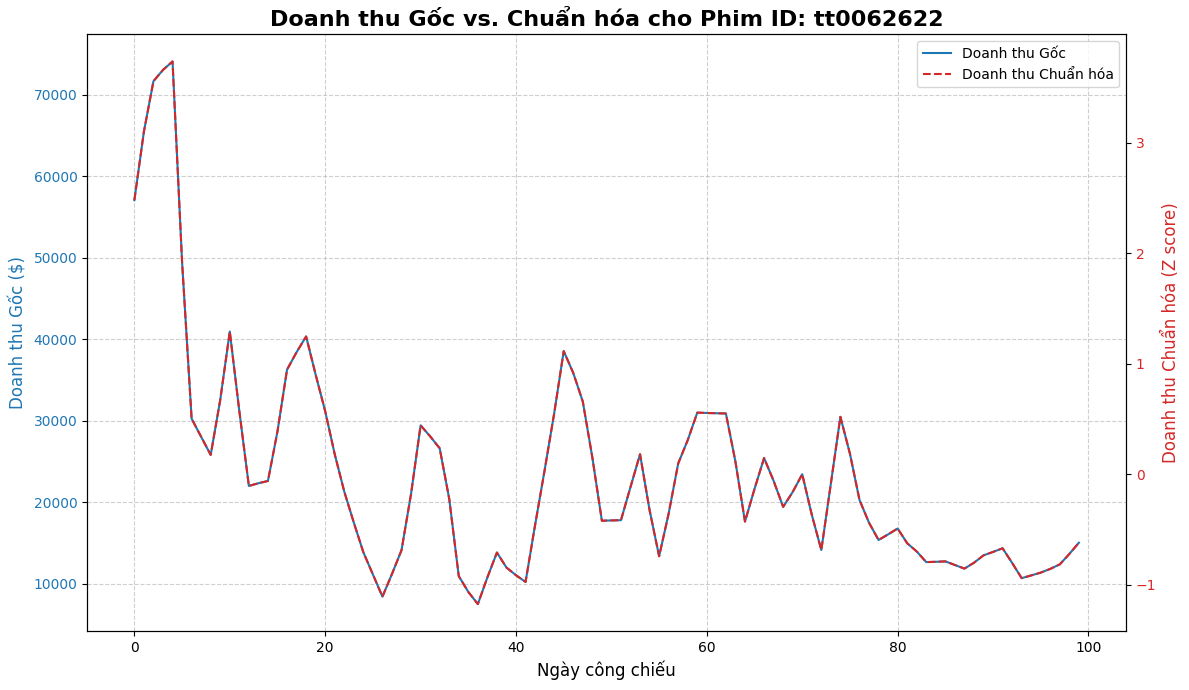

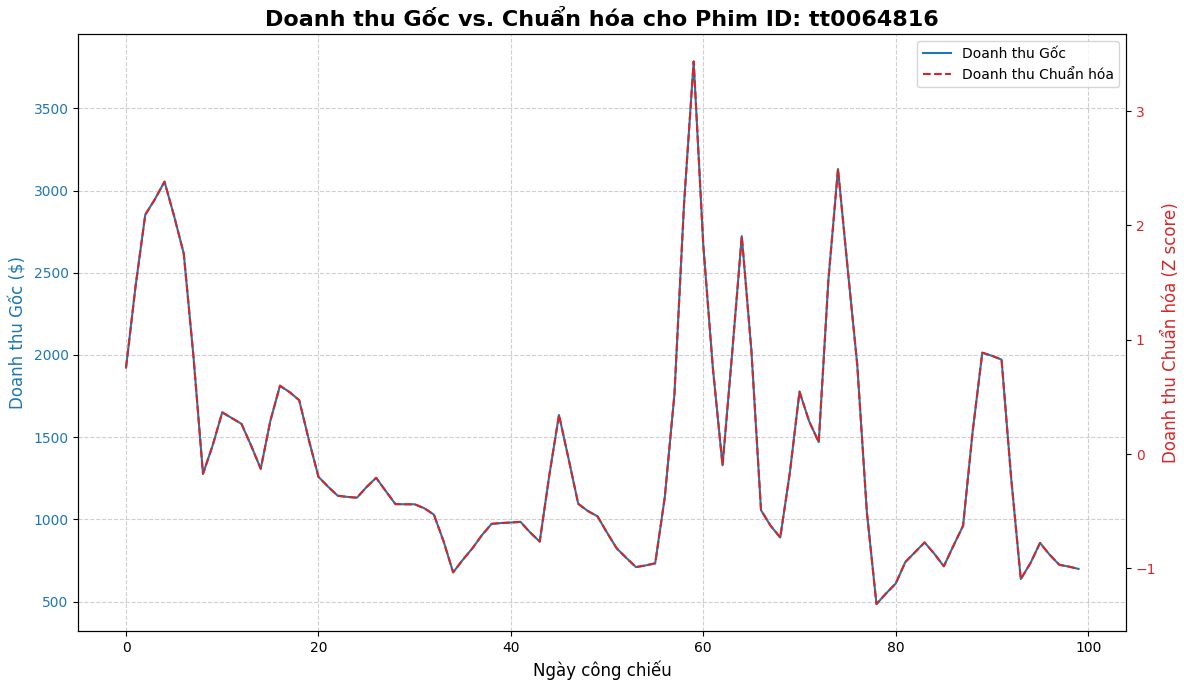

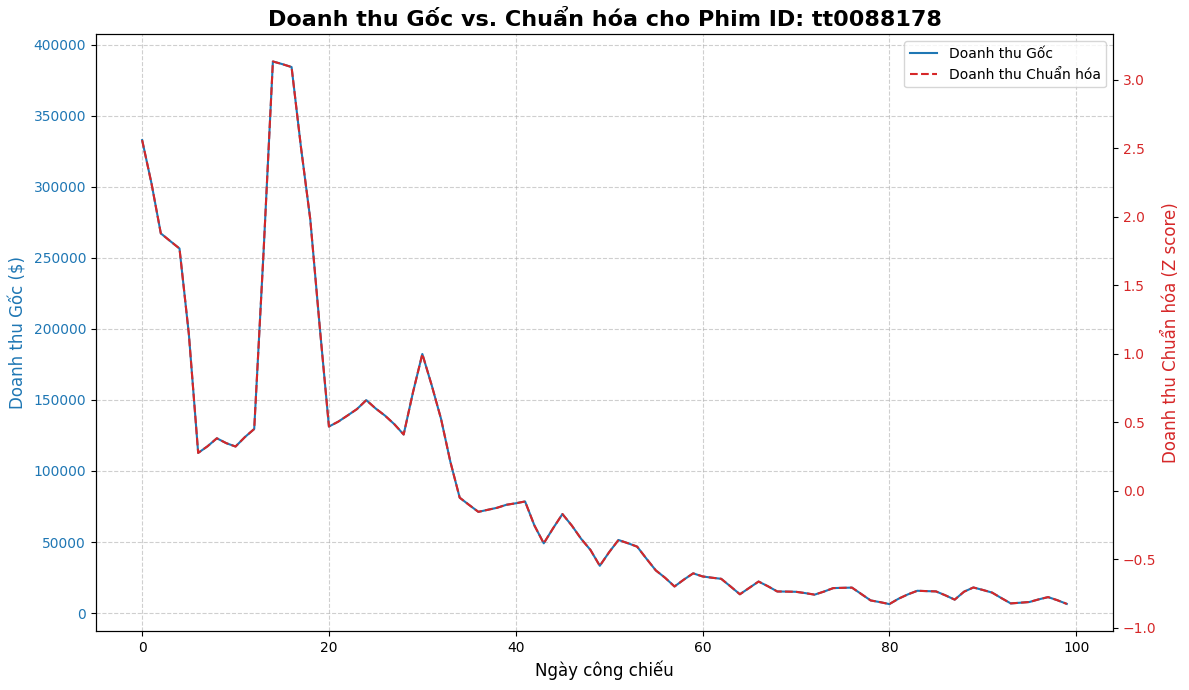

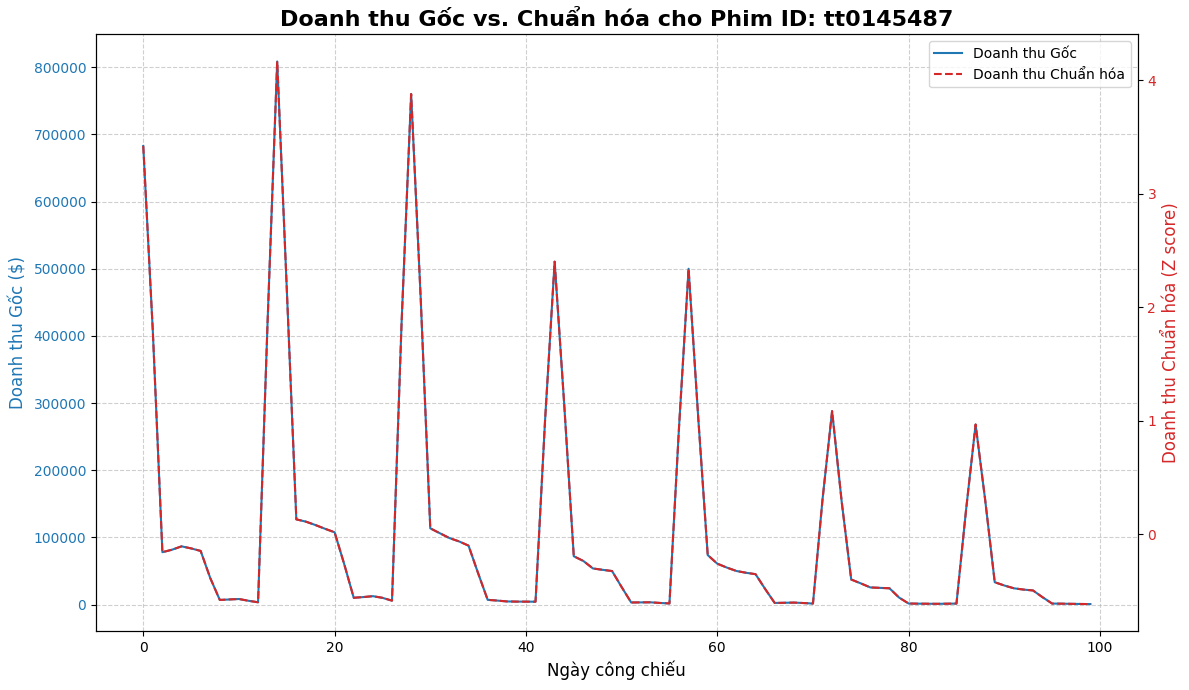

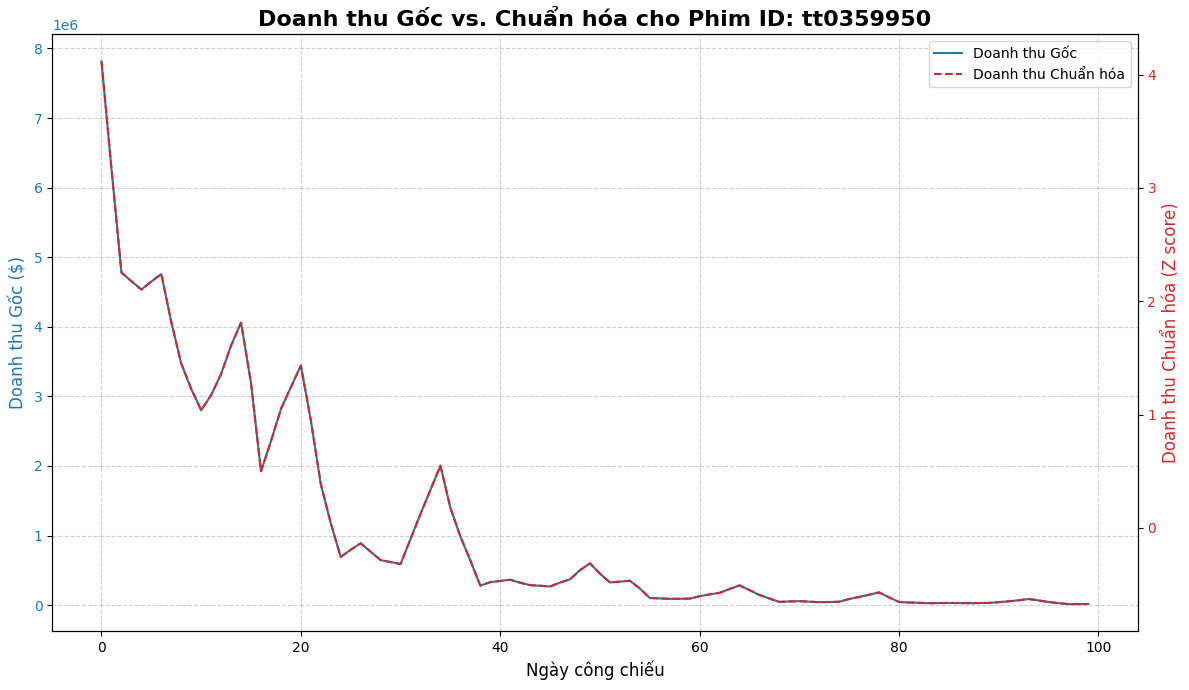

Hoàn thành! Đã vẽ và lưu thành công 5 biểu đồ.


In [ ]:
# Import các thư viện cần thiết cho việc vẽ biểu đồ
import matplotlib.pyplot as plt
import numpy as np

# --- GIẢ ĐỊNH BẠN ĐÃ CÓ 2 DATAFRAME NÀY ---
# ts: Chứa dữ liệu gốc từ file imdb_ts.csv
# ts_normalized: Chứa dữ liệu đã được chuẩn hóa bằng Min-Max Scaler

# --- BƯỚC VẼ BIỂU ĐỒ ---

# Xác định các cột doanh thu và số ngày để vẽ
revenue_cols = [str(i) for i in range(100)]
days = np.arange(len(revenue_cols))

# Số lượng phim cần vẽ
num_plots = 5

print(f"Bắt đầu vẽ {num_plots} biểu đồ so sánh...")

# Bắt đầu vòng lặp để vẽ cho từng bộ phim
for i in range(num_plots):
    # Lấy ID của bộ phim từ DataFrame gốc
    #movie_id = ts.loc[i, 'id']
    # Lấy ID từ chỉ mục của hàng thứ i
    movie_id = ts.index[i]
    # Lấy dữ liệu doanh thu tương ứng từ hai DataFrame
    original_revenue = ts.iloc[i][revenue_cols].astype(float)
    zscore_revenue = ts_zscore.iloc[i][revenue_cols].astype(float)

    # Tạo một không gian vẽ mới cho mỗi biểu đồ
    plt.figure(figsize=(12, 7))

    # Tạo trục tung thứ nhất (bên trái) cho Doanh thu Gốc
    ax1 = plt.gca()
    color = 'tab:blue'
    ax1.set_xlabel('Ngày công chiếu', fontsize=12)
    ax1.set_ylabel('Doanh thu Gốc ($)', color=color, fontsize=12)
    ax1.plot(days, original_revenue, color=color, label='Doanh thu Gốc')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True, linestyle='--', alpha=0.6)

    # Tạo trục tung thứ hai (bên phải) cho Doanh thu Chuẩn hóa
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Doanh thu Chuẩn hóa (Z score)', color=color, fontsize=12)
    ax2.plot(days, zscore_revenue, color=color, linestyle='--', label='Doanh thu Chuẩn hóa')
    ax2.tick_params(axis='y', labelcolor=color)

    # Đặt tiêu đề và chú thích cho biểu đồ
    plt.title(f'Doanh thu Gốc vs. Chuẩn hóa cho Phim ID: {movie_id}', fontsize=16, fontweight='bold')
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

    # Tự động điều chỉnh bố cục
    plt.tight_layout()

    # Lưu biểu đồ vào file ảnh
    output_filename = f'comparison_plot_{movie_id}.png'
    plt.savefig(output_filename)
    plt.show()
    plt.close() # Đóng hình vẽ để giải phóng bộ nhớ

print(f"Hoàn thành! Đã vẽ và lưu thành công {num_plots} biểu đồ.")

## Mean Removal

In [ ]:
# Import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Tạo một bản sao để không ảnh hưởng đến dữ liệu gốc
ts_mean_removed = ts.copy()
print("Đã tạo bản sao dữ liệu để thực hiện biến đổi.")

# Xác định các cột doanh thu
revenue_cols = [str(i) for i in range(100)]
existing_revenue_cols = [col for col in revenue_cols if col in ts_mean_removed.columns]

if not existing_revenue_cols:
    raise ValueError("Không tìm thấy các cột doanh thu trong DataFrame.")

# Tính giá trị trung bình cho mỗi hàng (mỗi bộ phim)
row_means = ts_mean_removed[existing_revenue_cols].mean(axis=1)

# Trừ đi giá trị trung bình của mỗi hàng tương ứng
# df.sub() với axis=0 cho phép trừ một Series (row_means) từ các hàng của DataFrame
ts_mean_removed[existing_revenue_cols] = ts_mean_removed[existing_revenue_cols].sub(row_means, axis=0)

print("Đã thực hiện loại bỏ giá trị trung bình (Mean Removal) thành công.")


Đã tạo bản sao dữ liệu để thực hiện biến đổi.
Đã thực hiện loại bỏ giá trị trung bình (Mean Removal) thành công.


In [ ]:
ts_mean_removed.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,rating,genre,rating_category
id,,,,,,,,,,,,,,,,,,,,,
tt0062622,33627.27,42039.27,48212.27,49595.27,50630.27,26042.27,6828.27,4606.27,2394.27,9141.27,...,-12720.73,-12387.73,-12041.73,-11582.73,-11025.73,-9750.73,-8373.73,8.3,"['Adventure', 'Sci-Fi']",High
tt0064816,525.23,1024.23,1455.23,1549.23,1656.23,1446.23,1219.23,600.23,-120.77,51.23,...,-760.77,-663.77,-540.77,-612.77,-673.77,-684.77,-698.77,7.1,"['Crime', 'Drama', 'Romance']",High
tt0088178,246703.97,216281.97,181042.97,175657.97,170386.97,110308.97,26506.97,31162.97,36802.97,33386.97,...,-79437.03,-78968.03,-78445.03,-76589.03,-75009.03,-77211.03,-79790.03,8.7,"['Documentary', 'Music']",High
tt0145487,577940.89,302115.89,-26858.11,-23184.11,-18144.11,-21192.11,-24976.11,-65260.11,-97942.11,-97219.11,...,-83822.11,-93921.11,-103330.11,-103495.11,-103739.11,-103946.11,-104114.11,7.4,"['Action', 'Adventure', 'Sci-Fi']",High
tt0359950,6702112.74,5163303.74,3670328.74,3543786.74,3424041.74,3539314.74,3647192.74,2958168.74,2360495.74,1996797.74,...,-1022624.26,-1042912.26,-1065892.26,-1082344.26,-1095765.26,-1095104.26,-1094406.26,7.3,"['Adventure', 'Comedy', 'Drama']",High


In [ ]:
# Xác định các cột doanh thu và số ngày để vẽ
revenue_cols = [str(i) for i in range(100)]
days = np.arange(len(revenue_cols))

# Số lượng phim cần vẽ
num_plots = 5

print(f"Bắt đầu vẽ {num_plots} biểu đồ so sánh...")

# Bắt đầu vòng lặp để vẽ cho từng bộ phim
for i in range(num_plots):
    # Lấy ID của bộ phim từ DataFrame gốc
    #movie_id = ts.loc[i, 'id']
    # Lấy ID từ chỉ mục của hàng thứ i
    movie_id = ts.index[i]
    # Lấy dữ liệu doanh thu tương ứng từ hai DataFrame
    original_revenue = ts.iloc[i][revenue_cols].astype(float)
    zscore_revenue = ts_zscore.iloc[i][revenue_cols].astype(float)

    # Tạo một không gian vẽ mới cho mỗi biểu đồ
    plt.figure(figsize=(12, 7))

    # Tạo trục tung thứ nhất (bên trái) cho Doanh thu Gốc
    ax1 = plt.gca()
    color = 'tab:blue'
    ax1.set_xlabel('Ngày công chiếu', fontsize=12)
    ax1.set_ylabel('Doanh thu Gốc ($)', color=color, fontsize=12)
    ax1.plot(days, original_revenue, color=color, label='Doanh thu Gốc')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True, linestyle='--', alpha=0.6)

    # Tạo trục tung thứ hai (bên phải) cho Doanh thu Chuẩn hóa
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Doanh thu Chuẩn hóa (Z score)', color=color, fontsize=12)
    ax2.plot(days, zscore_revenue, color=color, linestyle='--', label='Doanh thu Chuẩn hóa')
    ax2.tick_params(axis='y', labelcolor=color)

    # Đặt tiêu đề và chú thích cho biểu đồ
    plt.title(f'Doanh thu Gốc vs. Chuẩn hóa cho Phim ID: {movie_id}', fontsize=16, fontweight='bold')
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

    # Tự động điều chỉnh bố cục
    plt.tight_layout()

    # Lưu biểu đồ vào file ảnh
    output_filename = f'comparison_plot_{movie_id}.png'
    plt.savefig(output_filename)
    plt.show()
    plt.close() # Đóng hình vẽ để giải phóng bộ nhớ

print(f"Hoàn thành! Đã vẽ và lưu thành công {num_plots} biểu đồ.")


Bắt đầu vẽ 5 biểu đồ so sánh...


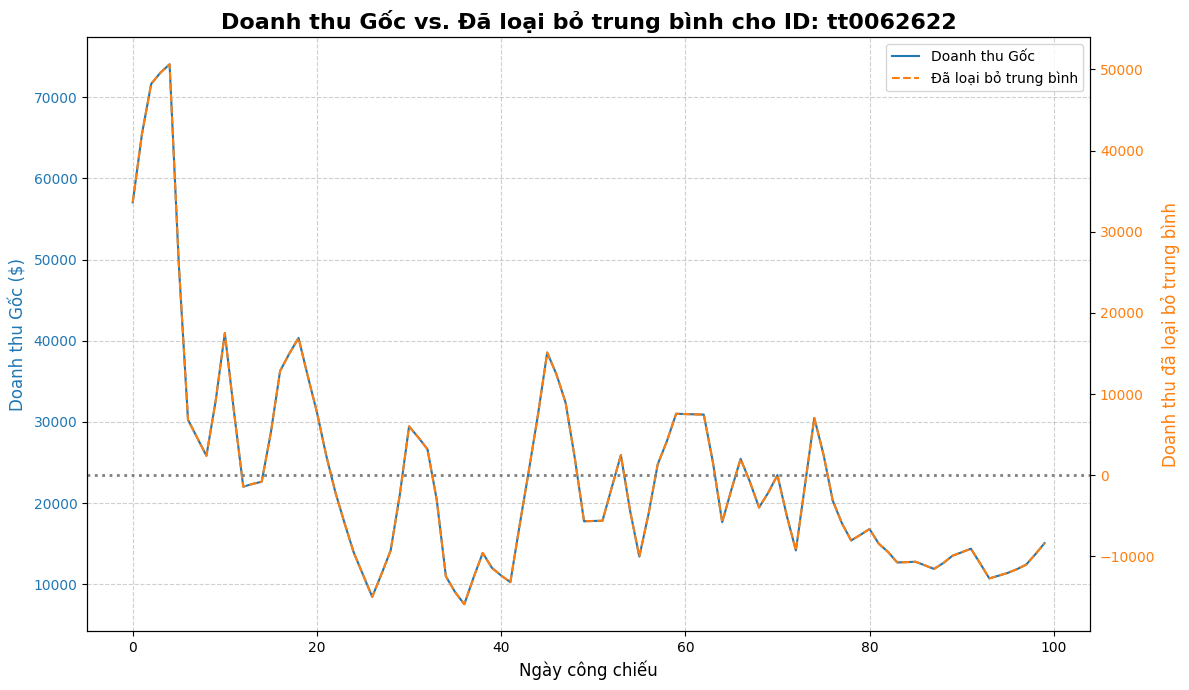

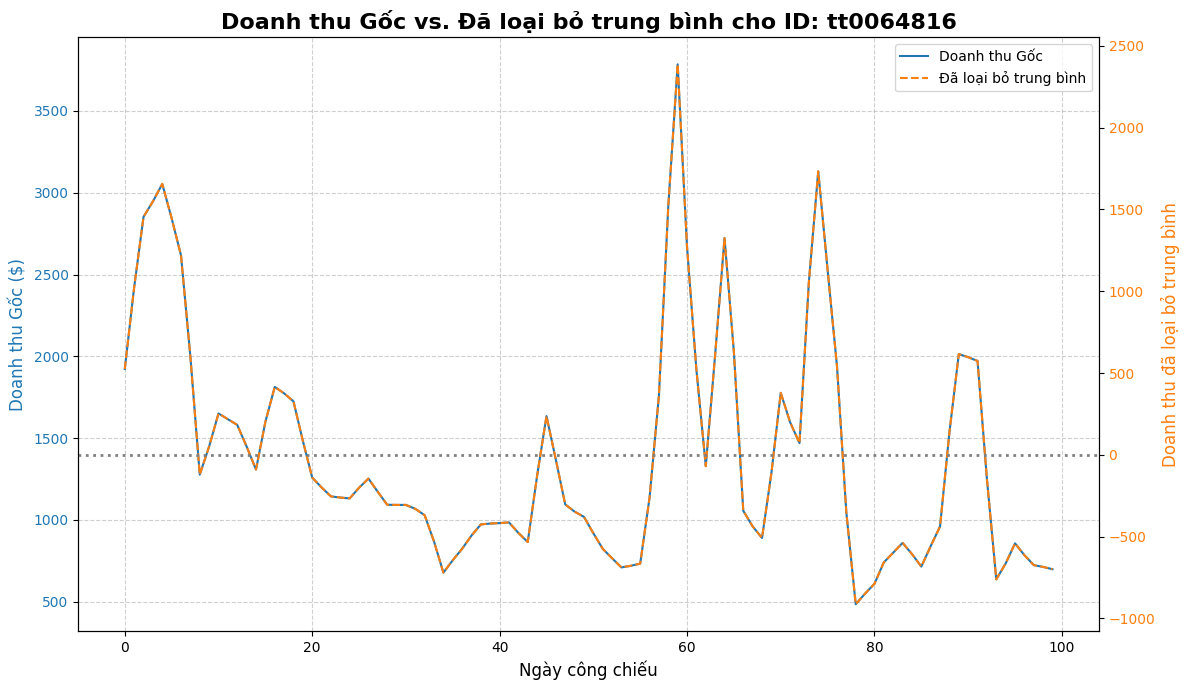

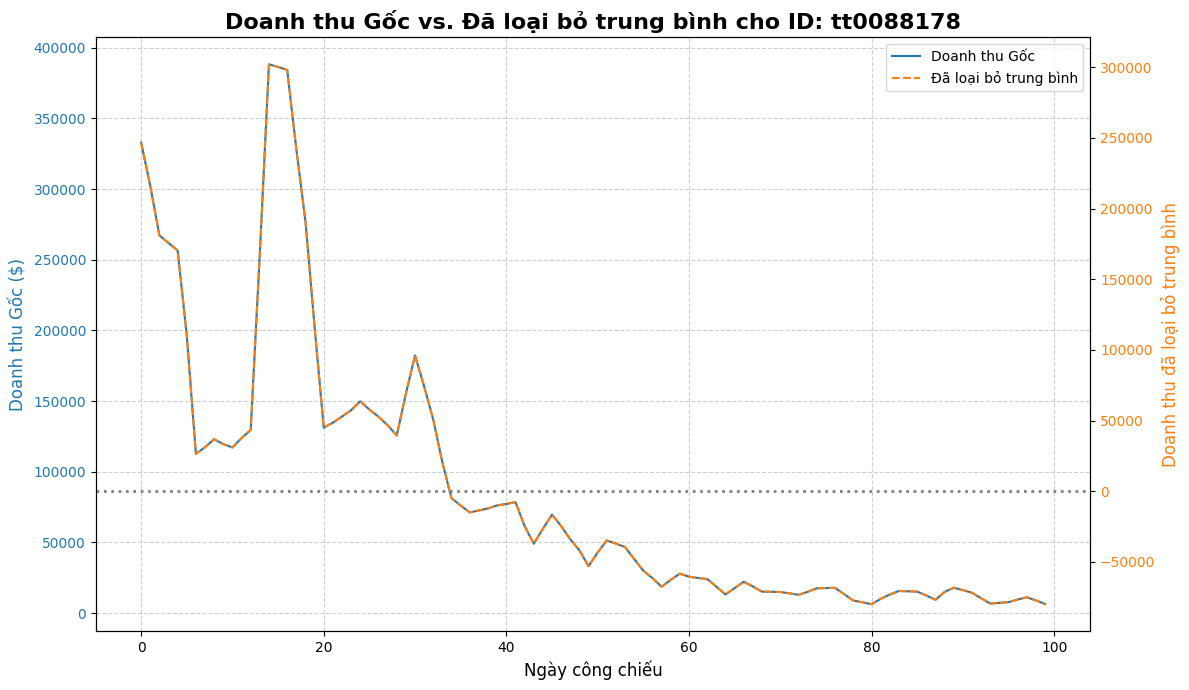

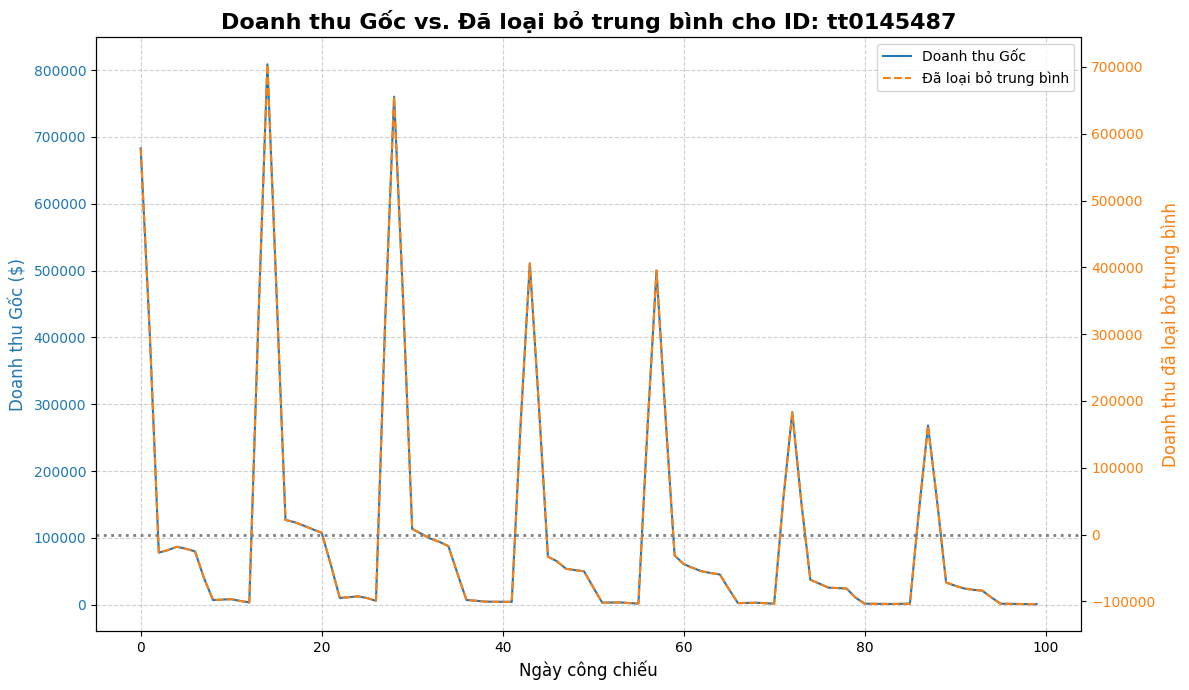

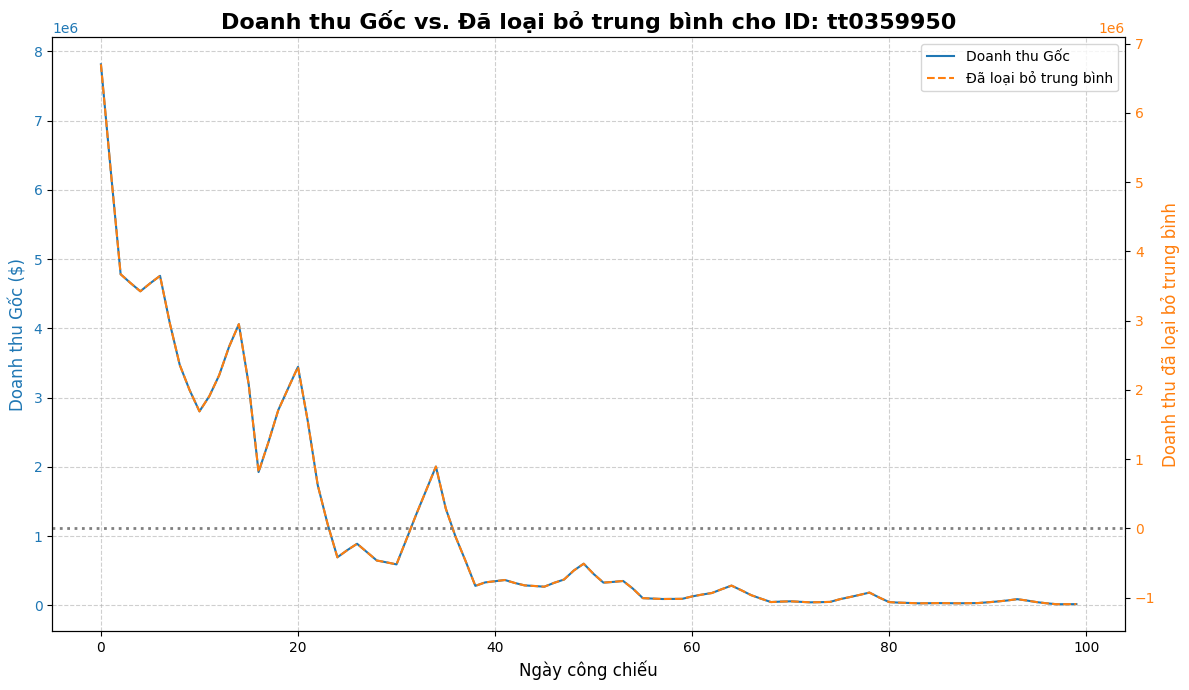

Hoàn thành! Đã vẽ và lưu 5 biểu đồ.


In [ ]:
num_plots = 5
days = np.arange(len(existing_revenue_cols))

print(f"\nBắt đầu vẽ {num_plots} biểu đồ so sánh...")

for i in range(num_plots):
    movie_id = ts.index[i]
    # Lấy dữ liệu gốc và dữ liệu đã biến đổi
    original_revenue = ts.iloc[i][revenue_cols].astype(float)
    mean_removed_revenue = ts_mean_removed.iloc[i][revenue_cols].astype(float)

    plt.figure(figsize=(12, 7))

    # Trục Y thứ nhất cho Doanh thu Gốc
    ax1 = plt.gca()
    color = 'tab:blue'
    ax1.set_xlabel('Ngày công chiếu', fontsize=12)
    ax1.set_ylabel('Doanh thu Gốc ($)', color=color, fontsize=12)
    ax1.plot(days, original_revenue, color=color, label='Doanh thu Gốc')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True, linestyle='--', alpha=0.6)

    # Trục Y thứ hai cho Doanh thu đã loại bỏ trung bình
    ax2 = ax1.twinx()
    color = 'tab:orange'
    ax2.set_ylabel('Doanh thu đã loại bỏ trung bình', color=color, fontsize=12)
    ax2.plot(days, mean_removed_revenue, color=color, linestyle='--', label='Đã loại bỏ trung bình')
    ax2.tick_params(axis='y', labelcolor=color)
    # Đường tham chiếu tại y=0 là giá trị trung bình mới của dữ liệu
    ax2.axhline(0, color='grey', linestyle=':', linewidth=2)

    plt.title(f'Doanh thu Gốc vs. Đã loại bỏ trung bình cho ID: {movie_id}', fontsize=16, fontweight='bold')
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

    plt.tight_layout()

    # Lưu biểu đồ vào file ảnh
    output_filename = f'mean_removed_comparison_plot_{movie_id}.png'
    plt.savefig(output_filename)
    plt.show()
    plt.close()

print(f"Hoàn thành! Đã vẽ và lưu {num_plots} biểu đồ.")

### Find out non stationary

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def find_non_stationary_movies(input_filename="/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/imdb_ts.csv", output_filename="/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/non_stationary_ts.csv"):
    """
    Hàm này đọc một tệp CSV chứa dữ liệu chuỗi thời gian doanh thu phim,
    kiểm tra tính dừng cho mỗi phim và lưu ID của các phim không dừng
    vào một tệp CSV mới.

    Args:
        input_filename (str): Tên của tệp CSV đầu vào.
        output_filename (str): Tên của tệp CSV đầu ra.
    """
    try:
        # 2. Bỏ 3 cột cuối cùng của dataset
        # .iloc[:, :-3] chọn tất cả các hàng và tất cả các cột TRỪ 3 cột cuối.
        ts_revenue = ts.iloc[:, :-3]

        # 3. Chuẩn bị danh sách để lưu kết quả
        non_stationary_movies_ids = []

        # 4. Lặp qua từng bộ phim để phân tích
        for movie_id, row in ts_revenue.iterrows():

            # Dữ liệu chuỗi thời gian là từ cột thứ 2 trở đi.
            # .dropna() để loại bỏ các giá trị rỗng có thể gây lỗi.
            time_series_data = row.dropna()

            # Kiểm định chỉ có ý nghĩa nếu có nhiều hơn một điểm dữ liệu.
            if len(time_series_data) > 1:
                # 5. Thực hiện kiểm định ADF
                result = adfuller(time_series_data)

                # Lấy giá trị p-value (nằm ở vị trí thứ 2 trong kết quả)
                p_value = result[1]

                # 6. Kiểm tra điều kiện không dừng
                # Nếu p-value > 0.05, chúng ta không thể bác bỏ giả thuyết
                # "chuỗi không dừng".
                if p_value > 0.05:
                    non_stationary_movies_ids.append(movie_id)

        # 7. Lưu kết quả ra tệp mới
        # Tạo DataFrame mới từ danh sách các ID tìm được.
        non_stationary_ts = pd.DataFrame(non_stationary_movies_ids, columns=['id'])

        # Ghi DataFrame ra tệp CSV, không bao gồm cột chỉ mục của pandas.
        output_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/non_stationary_ts.csv'

        non_stationary_ts.to_csv(output_path, index=False)


        print(f"Phân tích hoàn tất! Tìm thấy {len(non_stationary_ts)} phim không dừng.")
        print(f"Kết quả đã được lưu vào tệp '{output_filename}'.")

    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy tệp '{input_filename}'. Vui lòng kiểm tra lại tên tệp.")
    except Exception as e:
        print(f"Đã có lỗi xảy ra trong quá trình xử lý: {e}")

# Gọi hàm để chạy phân tích
find_non_stationary_movies()

Phân tích hoàn tất! Tìm thấy 317 phim không dừng.
Kết quả đã được lưu vào tệp 'non_stationary_movies.csv'.


## Step by step to nomalize data

### Detrending

Bắt đầu xử lý loại bỏ xu hướng cho từng phim...
Đã hoàn tất việc loại bỏ xu hướng.
Đang tạo biểu đồ so sánh cho 5 phim đầu tiên...
Đã lưu biểu đồ: detrend_comparison_tt0088178.png
Đã lưu biểu đồ: detrend_comparison_tt0145487.png
Đã lưu biểu đồ: detrend_comparison_tt0790636.png
Đã lưu biểu đồ: detrend_comparison_tt0810819.png
Đã lưu biểu đồ: detrend_comparison_tt0816442.png

Hoàn tất! Các biểu đồ đã được lưu dưới dạng tệp .png.


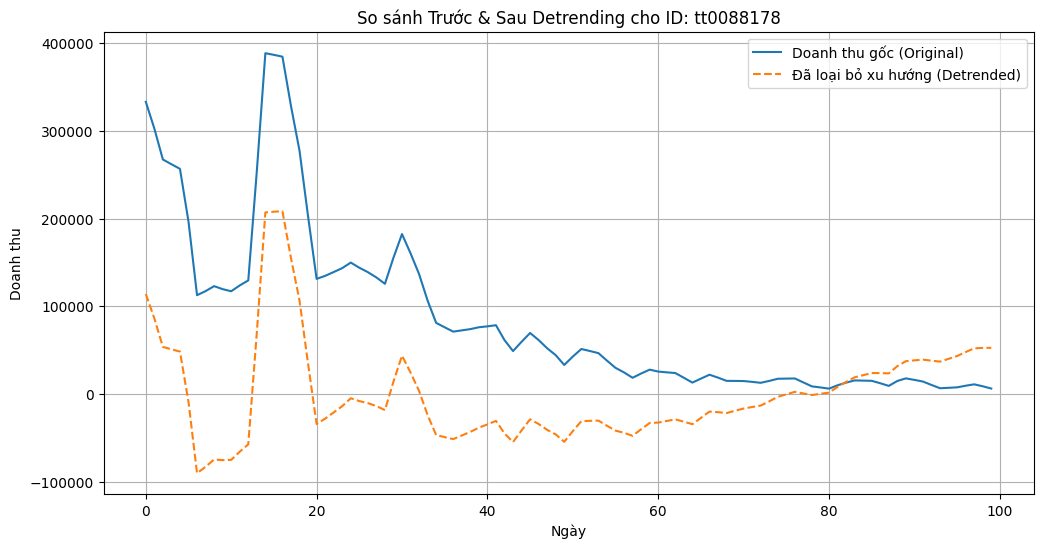

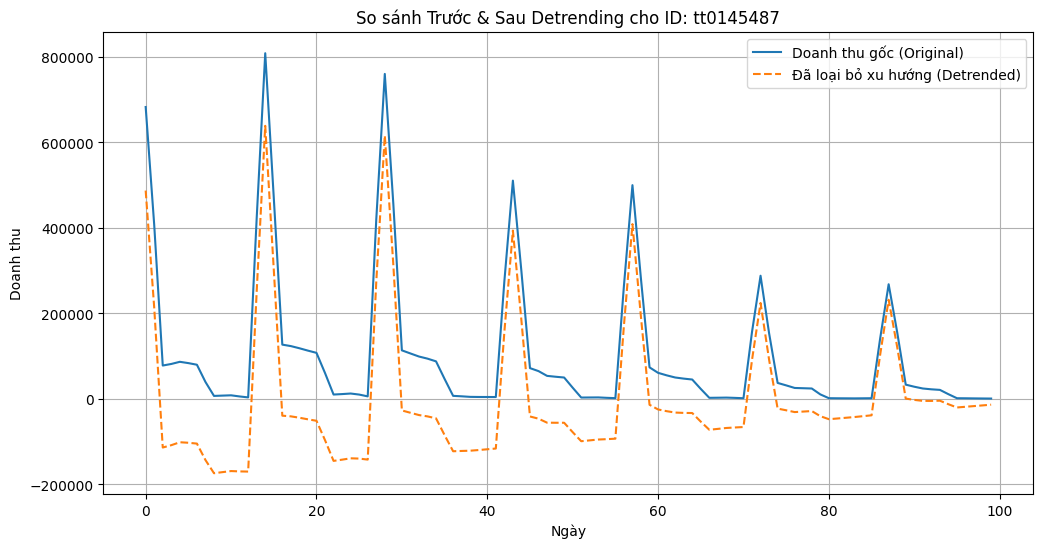

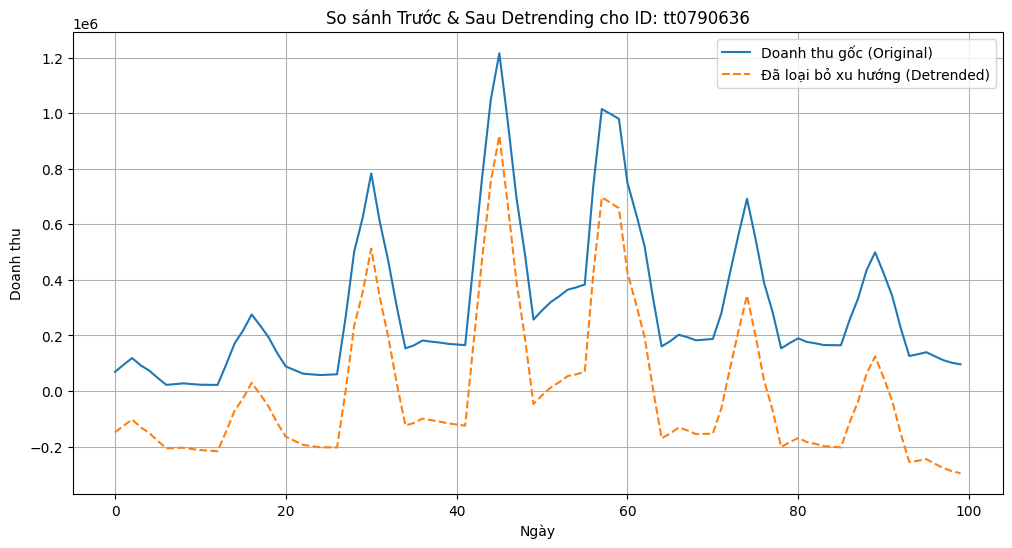

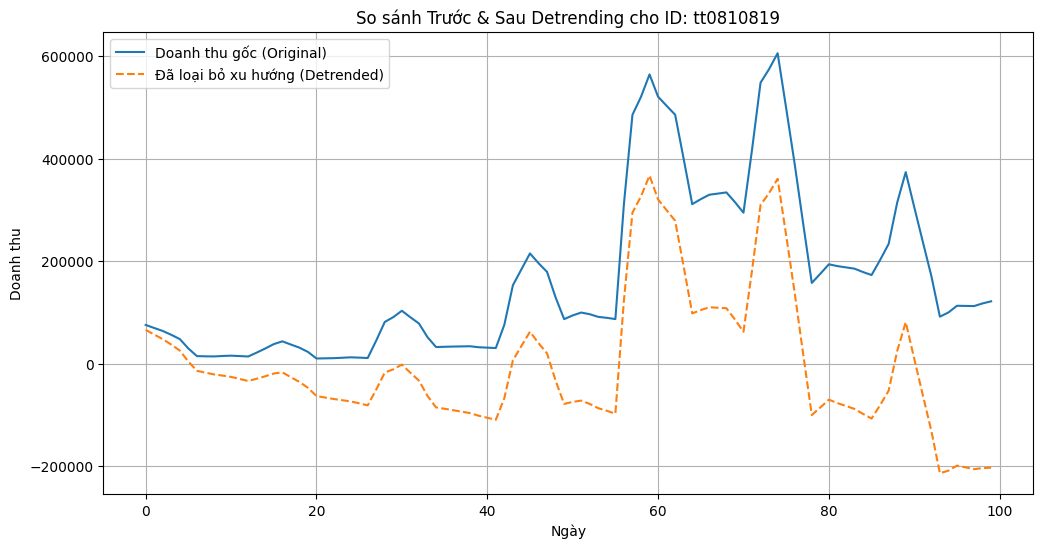

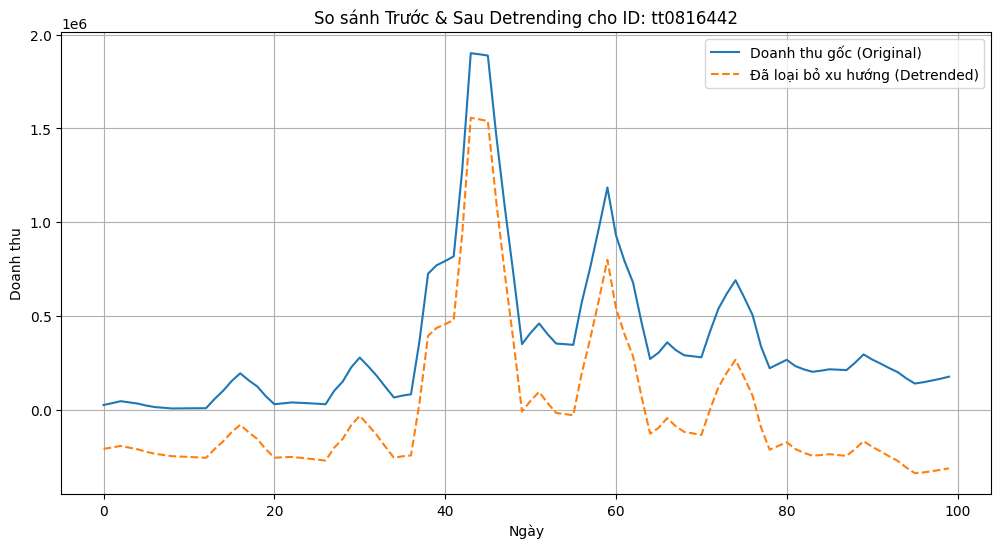

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sktime.transformations.series.detrend import Detrender

def detrend_and_visualize_corrected(original_data_file="imdb_ts.csv", non_stationary_file="/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/non_stationary_ts.csv"):
    """
    Hàm này đã được sửa lỗi để xử lý đúng định dạng dữ liệu cho sktime.
    """
    try:
        # 1. Đọc dữ liệu
        #ts = pd.read_csv(original_data_file, index_col=0)
        non_stationary_ts = pd.read_csv(non_stationary_file)
        ids_to_process = non_stationary_ts['id'].tolist()
        ts_to_detrend = ts.loc[ids_to_process]
        revenue_data = ts_to_detrend.iloc[:, :-3]

        # Khởi tạo công cụ Detrender
        detrender = Detrender()

        # 2. Tạo một DataFrame rỗng để chứa kết quả sau khi xử lý
        detrended_revenue = pd.DataFrame(index=revenue_data.index, columns=revenue_data.columns)

        print("Bắt đầu xử lý loại bỏ xu hướng cho từng phim...")

        # 3. Lặp qua từng phim để xử lý riêng lẻ
        for movie_id, original_series in revenue_data.iterrows():
            # Lấy dữ liệu của 1 phim (đây là một pd.Series) và bỏ các giá trị rỗng
            series_to_process = original_series.dropna()

            # Bỏ qua nếu không có đủ dữ liệu
            if series_to_process.empty:
                continue

            # 4. Chuyển đổi index của series (các cột '0', '1', '2'...) thành SỐ
            # Đây là yêu cầu quan trọng của sktime
            series_to_process.index = pd.to_numeric(series_to_process.index)

            # 5. Áp dụng detrend cho TỪNG series một
            detrended_series = detrender.fit_transform(series_to_process)

            # 6. Lưu kết quả vào DataFrame mới
            # Gán lại giá trị vào đúng các cột/hàng tương ứng
            detrended_revenue.loc[movie_id, detrended_series.index] = detrended_series.values

        print("Đã hoàn tất việc loại bỏ xu hướng.")
        ts.head()
        # 7. Trực quan hóa kết quả cho 5 phim đầu tiên
        print("Đang tạo biểu đồ so sánh cho 5 phim đầu tiên...")
        ids_to_plot = ids_to_process[:5]

        for movie_id in ids_to_plot:
            plt.figure(figsize=(12, 6))
            plt.plot(revenue_data.loc[movie_id].values, label='Doanh thu gốc (Original)')
            # Lấy dữ liệu đã xử lý và bỏ giá trị rỗng để vẽ
            plt.plot(detrended_revenue.loc[movie_id].dropna().values, label='Đã loại bỏ xu hướng (Detrended)', linestyle='--')
            plt.title(f'So sánh Trước & Sau Detrending cho ID: {movie_id}')
            plt.xlabel('Ngày')
            plt.ylabel('Doanh thu')
            plt.legend()
            plt.grid(True)
            output_plot_filename = f'detrend_comparison_{movie_id}.png'
            plt.savefig(output_plot_filename)
            print(f"Đã lưu biểu đồ: {output_plot_filename}")

        print("\nHoàn tất! Các biểu đồ đã được lưu dưới dạng tệp .png.")

    except FileNotFoundError as e:
        print(f"Lỗi: Không tìm thấy tệp! Vui lòng kiểm tra lại tên tệp: {e.filename}")
    except Exception as e:
        print(f"Đã có lỗi xảy ra: {e}")

# Gọi hàm để chạy toàn bộ quá trình
detrend_and_visualize_corrected()

In [ ]:
import pandas as pd
from sktime.transformations.series.detrend import Detrender

def detrend_and_update_inplace(original_data_file="imdb_ts.csv",
                               non_stationary_file="/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/non_stationary_ts.csv",
                               output_filename="imdb_ts_detrended.csv"):
    """
    Hàm này thực hiện:
    1. Đọc dữ liệu gốc và danh sách ID không dừng.
    2. Áp dụng detrending cho các phim không dừng.
    3. Cập nhật trực tiếp giá trị đã detrend vào DataFrame gốc.
    4. Lưu toàn bộ DataFrame đã cập nhật ra file CSV mới.
    """
    try:
        # 1. Đọc dữ liệu
        print("Bắt đầu đọc dữ liệu...")
        #ts = pd.read_csv(original_data_file, index_col=0)
        non_stationary_ts = pd.read_csv(non_stationary_file)

        ids_to_process = non_stationary_ts['id'].tolist()

        # Khởi tạo công cụ Detrender
        detrender = Detrender()

        print(f"Tìm thấy {len(ids_to_process)} phim không dừng. Bắt đầu cập nhật...")

        # 2. Lặp qua các phim cần xử lý
        for movie_id in ids_to_process:
            # Lấy dữ liệu doanh thu của 1 phim (bỏ 3 cột cuối)
            revenue_series_raw = ts.loc[movie_id].iloc[:-3]

            # Ép kiểu dữ liệu thành số để tránh lỗi, chuyển các giá trị text thành rỗng (NaN)
            series_numeric = pd.to_numeric(revenue_series_raw, errors='coerce')
            series_to_process = series_numeric.dropna()

            if series_to_process.empty:
                print(f"Bỏ qua phim {movie_id} vì không có dữ liệu doanh thu.")
                continue

            # Chuyển index cột ('0', '1'...) thành số để sktime xử lý
            series_to_process.index = pd.to_numeric(series_to_process.index)

            # Áp dụng detrend
            detrended_series = detrender.fit_transform(series_to_process)

            # --- YÊU CẦU CỦA BẠN: CẬP NHẬT TRỰC TIẾP VÀO DATAFRAME GỐC 'ts' ---
            # Tìm đến đúng hàng (movie_id) và các cột tương ứng (index của detrended_series)
            # rồi gán giá trị mới vào.
            ts.loc[movie_id, detrended_series.index.astype(str)] = detrended_series.values

        print("Đã hoàn tất việc detrend và cập nhật.")

        # 3. Lưu toàn bộ DataFrame 'ts' đã được cập nhật
        print(f"Đang lưu dữ liệu đã cập nhật vào tệp '{output_filename}'...")

        # Chuyển cột 'id' từ index thành một cột thông thường trước khi lưu
        ts.reset_index(inplace=True)
        ts.rename(columns={'index': 'id'}, inplace=True)

        # Lưu vào file CSV
        ts.to_csv(output_filename, index=False)

        print(f"\nQuy trình hoàn tất! File '{output_filename}' đã được tạo với dữ liệu cập nhật.")

    except FileNotFoundError as e:
        print(f"Lỗi: Không tìm thấy tệp! Vui lòng kiểm tra lại tên tệp: {e.filename}")
    except KeyError as e:
        print(f"Lỗi: Không tìm thấy ID phim trong dữ liệu gốc. ID bị lỗi: {e}")
    except Exception as e:
        print(f"Đã có lỗi xảy ra: {e}")

# Chạy toàn bộ quy trình
detrend_and_update_inplace()

Bắt đầu đọc dữ liệu...
Tìm thấy 317 phim không dừng. Bắt đầu cập nhật...
Đã hoàn tất việc detrend và cập nhật.
Đang lưu dữ liệu đã cập nhật vào tệp 'imdb_ts_detrended.csv'...

Quy trình hoàn tất! File 'imdb_ts_detrended.csv' đã được tạo với dữ liệu cập nhật.


In [ ]:
ts.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,rating,genre,rating_category
id,,,,,,,,,,,,,,,,,,,,,
tt0062622,57057.0,65469.0,71642.0,73025.0,74060.0,49472.0,30258.0,28036.0,25824.0,32571.0,...,10709.0,11042.0,11388.0,11847.0,12404.0,13679.0,15056.0,8.3,"['Adventure', 'Sci-Fi']",High
tt0064816,1923.0,2422.0,2853.0,2947.0,3054.0,2844.0,2617.0,1998.0,1277.0,1449.0,...,637.0,734.0,857.0,785.0,724.0,713.0,699.0,7.1,"['Crime', 'Drama', 'Romance']",High
tt0088178,332925.0,302503.0,267264.0,261879.0,256608.0,196530.0,112728.0,117384.0,123024.0,119608.0,...,6784.0,7253.0,7776.0,9632.0,11212.0,9010.0,6431.0,8.7,"['Documentary', 'Music']",High
tt0145487,682857.0,407032.0,78058.0,81732.0,86772.0,83724.0,79940.0,39656.0,6974.0,7697.0,...,21094.0,10995.0,1586.0,1421.0,1177.0,970.0,802.0,7.4,"['Action', 'Adventure', 'Sci-Fi']",High
tt0359950,7813372.0,6274563.0,4781588.0,4655046.0,4535301.0,4650574.0,4758452.0,4069428.0,3471755.0,3108057.0,...,88635.0,68347.0,45367.0,28915.0,15494.0,16155.0,16853.0,7.3,"['Adventure', 'Comedy', 'Drama']",High


### Z-score and save the new dataset

In [ ]:
import pandas as pd
from scipy.stats import zscore
import numpy as np

def normalize_and_save(input_filename="imdb_ts_detrended.csv",
                         output_filename="time-series-nomalize.csv"):
    """
    Hàm này thực hiện các bước cuối cùng:
    1. Đọc dữ liệu đã được detrend.
    2. Áp dụng chuẩn hóa Z-score cho dữ liệu doanh thu.
    3. Lưu kết quả cuối cùng ra file CSV.
    """
    try:
        # 1. Đọc dữ liệu đã detrend, sử dụng cột 'id' làm chỉ mục
        print(f"Bắt đầu đọc dữ liệu từ '{input_filename}'...")
        df = pd.read_csv(input_filename, index_col='id')

        # 2. Áp dụng chuẩn hóa Z-score
        print("Bắt đầu chuẩn hóa Z-score cho dữ liệu doanh thu...")

        # Lấy ra tất cả các cột doanh thu (bỏ 3 cột cuối)
        revenue_data = df.iloc[:, :-3]

        # Áp dụng Z-score cho từng hàng (mỗi phim)
        # Dùng zscore từ scipy, axis=1 để tính theo hàng
        # nan_policy='omit' để bỏ qua giá trị NaN khi tính toán
        # np.float64 để đảm bảo kiểu dữ liệu là số thực
        normalized_revenue_values = zscore(revenue_data.to_numpy(dtype=np.float64), axis=1, nan_policy='omit')

        # Tạo một DataFrame mới từ dữ liệu đã chuẩn hóa
        normalized_revenue_df = pd.DataFrame(normalized_revenue_values, index=revenue_data.index, columns=revenue_data.columns)

        # Cập nhật các cột doanh thu trong DataFrame gốc bằng dữ liệu đã chuẩn hóa
        df.iloc[:, :-3] = normalized_revenue_df

        print("Đã hoàn tất việc chuẩn hóa Z-score.")

        # 3. Lưu kết quả cuối cùng
        print(f"Đang lưu dữ liệu cuối cùng vào tệp '{output_filename}'...")

        # Chuyển cột 'id' từ index thành một cột thông thường trước khi lưu
        df.reset_index(inplace=True)

        output_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/time-series-nomalize.csv'


        df.to_csv(output_path, index=False)

        print(f"\nQuy trình hoàn tất! Dữ liệu đã được chuẩn hóa và lưu vào tệp '{output_filename}'.")

    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy tệp đầu vào '{input_filename}'. Vui lòng đảm bảo tệp đã được tạo từ bước trước.")
    except Exception as e:
        print(f"Đã có lỗi xảy ra: {e}")

# Chạy quy trình
normalize_and_save()

Bắt đầu đọc dữ liệu từ 'imdb_ts_detrended.csv'...
Bắt đầu chuẩn hóa Z-score cho dữ liệu doanh thu...
Đã hoàn tất việc chuẩn hóa Z-score.
Đang lưu dữ liệu cuối cùng vào tệp 'time-series-nomalize.csv'...

Quy trình hoàn tất! Dữ liệu đã được chuẩn hóa và lưu vào tệp 'time-series-nomalize.csv'.


## Motif